In [1]:
library(tidyverse)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(ggplot2)
library(broom)
library(gridExtra)
library(latex2exp)

library(FNN, quietly = T)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# Lecture 1: Introduction to Linear Regression

## 1. Summary

#### <b><font color=LightSeaGreen>1). Linear Regression</font></b>
- Linear Regression models provide a unifying framework to  <b><font color=salmon> estimate  and  test the true relation</font></b> a dependent variable and one or more independent variables. 
- Linear regression is a linear function  that models <b><font color=salmon>the conditional expectation of response</font></b> given a set of explanatory variables. (Assumption: linearly related)
- Linear Regression models can also be used to <b><font color=salmon> predict </font></b> the assessed value of a house although it may not be the best predictive model
- Research in linear models has been focused on 3 important aspects: estimation, inference, and prediction 
    - <b><font color=salmon>Estimation:</font></b> how to estimate the true (but unknown) relation between the dependant and the independent variables
    - <b><font color=salmon>Inference:</font></b> how to use the model to infer information about the unknown relation between variables
    - <b><font color=salmon>Prediction:</font></b> how to use the model to predict the value of the dependent variable for new observations 
|$X$|$Y$|
|:---:|:---:|
|independent variable|dependent variable|
|explanatory variable|explained variable|
|predictor|predicted variable|
|input variable|output variable|
|covariate|response|
|regressor|regressand|


#### <b><font color=LightSeaGreen>2). **Regression Line**</font></b>
> The regression line is a model for the conditional expectation and mathematically it has the form 

<b><font color=salmon>
$$E[Y|X_1] = \beta_0 + \beta_1 X_1 $$
$$Y= \beta_0 + \beta_1 X_1 + \varepsilon, \; E[\varepsilon|X_1]= E[\varepsilon]=0$$
</font></b>

<b><font color=salmon>Assumptions</font></b>

- The true intercept $\beta_0$ and the slope $\beta_1$ of this line are called <font color="blue"> regression parameters or coefficients </font> 
- The population parameters are usually *unknown*     
   - We will use a sample to estimate them using the `lm` function in R
- <b><font color=salmon>error term</font></b>
    - $E[\varepsilon]=0$ is not a strict assumptions since we can always satisfy this assumption changing the intercept. 
    - the error term captures the variables that will also affect the value of $Y$ but are not captured in the model, it may also refer to some measurement error. Usually, we assume the error term is independent of $X$. (distance between the actual data point and the population regression line)
    - The key assumption is $E[\varepsilon|X_1]= 0$. You can think this as "there is nothing left in the error related with the variable $X_1$". Confounding factors will make this assumption break! 
    - Although this assumption is rarely met in observational studies, it may not always be a serious concern. 
- <b><font color=salmon>Causality</font></b> 
    - Causality can not be established if $E[\varepsilon|X_1] \neq 0$ (so we cannot say: one unit change causes/affects the $\beta$ change of $Y$. Instead, we should say ***one unit change is associated the $\beta$ change of Y***)
    - because causal relationship means one dependent variable is affected by one explanatory variable. If the expected value of error term conditional on $X1$ is not zero, means the error term could affect the value of the dependent variable as well. Then the casual relationship between $X1$ and $Y$ could not be established.
    - estimators measure the association/relationship between explanatory variable and response variable
    - if we want to use words like **cause/effect**, we have to say holding all other factors constant. 
- A well designed experiment or some sophisticated methodologies (e.g., randomized trials) are required to draw causal conclusions from LR.
- *I recommend you to read the first chapter of Wooldrige for an extended discussion on this topic*


#### <b><font color=LightSeaGreen>3). Best predictor</font></b>
- The <font color=salmon>best predictor</font> of a random variable $Y$ is its expected value $E[Y]$, which can be estimated with the average value in a sample (a.k.a sample mean)
- If we have additional information from another variable, we can *condition* on it and look at subgroups of the population to obtain better predictors
- <font color=salmon>$Y|X$ is also a random variable.</font> Its distribution is called the <font color=salmon>conditional distribution</font> and its <font color=salmon>best predictor (average) is the conditional expectation $E[Y|X]$</font>
- "Best" means that it minimizes the <font color=salmon>mean squared error (MSE)</font>
    - MSE = $E[(Y - P)^2]$, where $P$ is the predictor (you can also call it $\hat{Y}$)
- In some cases, the conditional expectation can be modelled as a linear function, called the <font color=salmon> linear regression </font>

## 2. Population

**Notes**
- We are going to focus on the population of "Residential" properties
- For simplicity, values are adjusted per $1000

**Variables**
- the assessed value (the response $Y$ in a LR model) 
    - `assess_val` in the dataset
- the size (an explanatory variable $X_1$ in a LR model)
    - `BLDG_METRE` in the dataset
- the availability of a garage (another explanatory variable $X_2$ in a LR model)
    - `GARAGE` in the dataset
    
<b><font color=salmon> Important note</font></b>

- In general, we don't have information for all the population. We only have a **random sample** from the population and use it to **estimate and infer** information about the **unknown** population.
- We start with this particular case that has a finite population to emphasize the difference between population and sample quantities. Later, we'll just work with a random sample.

In [2]:
dat <- read.csv("data/Assessment_2015.csv")

#filter: residential houses
dat <- dat %>% filter(ASSESSCLAS=="Residential")  %>% 
        mutate(assess_val = ASSESSMENT / 1000)

dat  %>%  head(3)

,the_geom,TAX_YEAR,ROLL_NUM,ADDRESS,YEAR_BUILT,ASSESSCLAS,BLDG_DESC,BLDG_METRE,BLDG_FEET,GARAGE,FIREPLACE,BASEMENT,BSMTDEVL,ASSESSMENT,LATITUDE,LONGITUDE,assess_val
,<chr>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,POINT (-112.87633420362904 53.41074767160115),2015,1022705006,,1950,Residential,1 Storey & Basement,83,895,Y,Y,Y,Y,402000,53.41068,-112.8765,402
2,POINT (-112.91925958091502 53.40590216915645),2015,1017328004,229 51268 RNG RD 204,1983,Residential,1 Storey & Basement,77,831,N,Y,Y,N,292000,53.40588,-112.9196,292
3,POINT (-112.86295897279041 53.447144538217024),2015,1034103000,,1981,Residential,Split Entry,161,1731,N,Y,Y,Y,518000,53.44727,-112.8631,518


In [3]:
dat %>% summarize(pop_avg = mean(assess_val), pop_sd = sd(assess_val))

pop_avg,pop_sd
<dbl>,<dbl>
496.4043,187.5873


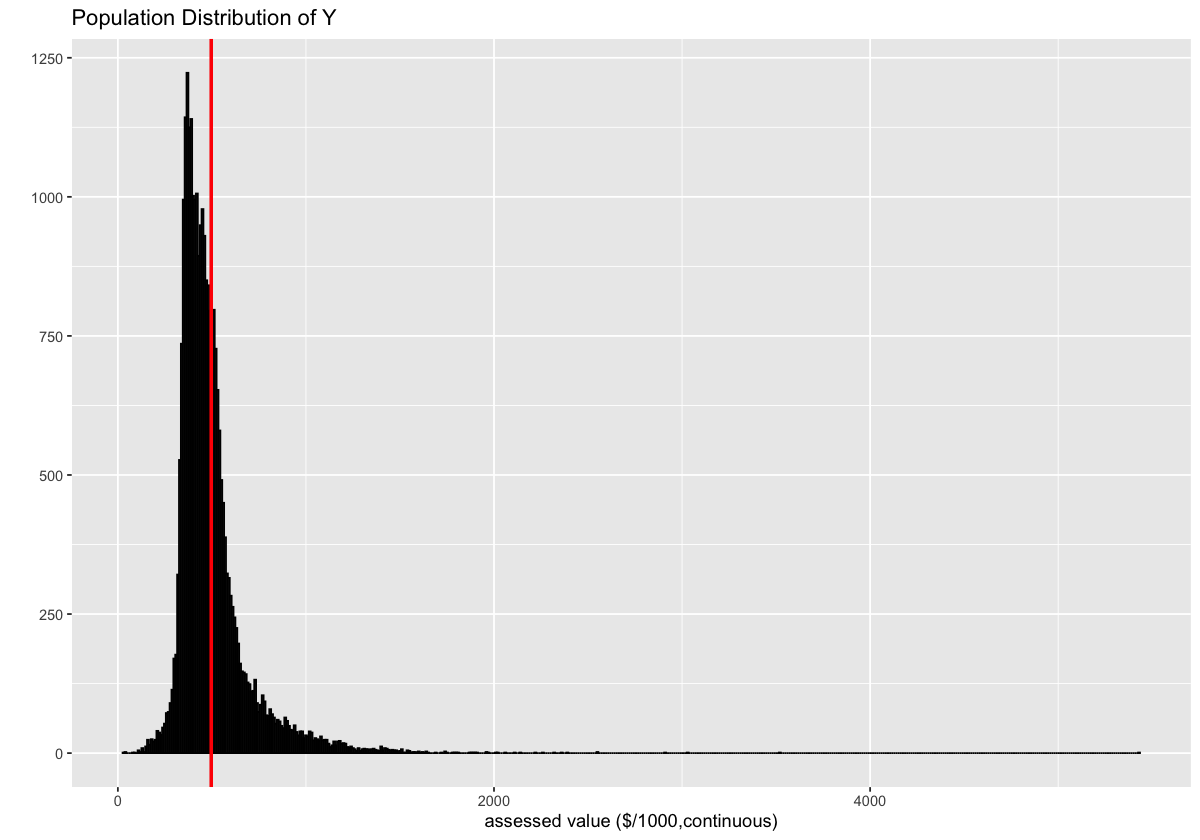

In [4]:
options(repr.plot.width=10, repr.plot.height=7)
qplot(dat$assess_val, geom = "histogram", binwidth = 10, color = I("black")) +
    geom_vline(aes(xintercept = mean(dat$assess_val)),col='red',size=1)+
    xlab("assessed value ($/1000,continuous)") +
    ggtitle("Population Distribution of Y")

## 3. $E[Y|X_1>300]$

#### Can we  characherize the distribution of `asess_val` with only `avg_value` and `sd_values`? 
- only true if we assume normality of the distribution
- this is <b><font color=salmon>not true for a finite population</font></b> but we will make this assumption later in the course

#### 1). $E[Y|X_1 > 300]$ for the whole population

> $E[Y|X_1 > 300] = 1138.7$    
> *sum the assessed value of all properties of size 300, divide by the number of properties of size 300*

In [5]:
dat %>%
  filter(BLDG_METRE > 300) %>%
  summarise(pop_avg_big = mean(assess_val), n_big = n())

pop_avg_big,n_big
<dbl>,<int>
1138.662,565


- the grey dots represent all properties in the population. 
- Superimposed, in black, are highligthted only the properties that have a size larger than 300 mts.
- the grey line is the overall average assessed value (of all properties). 
- The black line is the conditional average, for the subpopulation of black points.

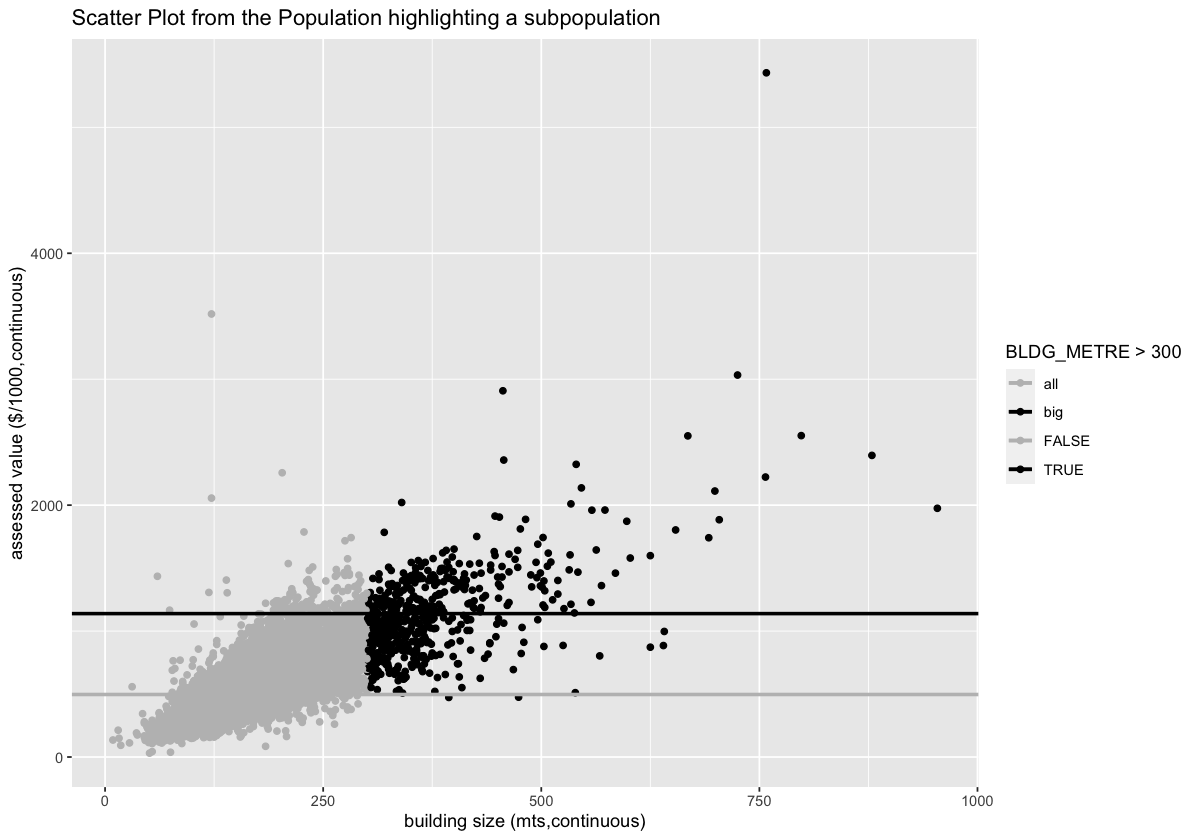

In [6]:
pop_cond <- ggplot(data = dat, aes(BLDG_METRE, assess_val)) +
  xlab("building size (mts,continuous)") +
  ylab("assessed value ($/1000,continuous)") +
  ggtitle("Scatter Plot from the Population highlighting a subpopulation") +
  geom_point(aes(x = BLDG_METRE, y = assess_val, colour = BLDG_METRE > 300)) +
  geom_hline(aes(yintercept = mean(assess_val), color = "all"), size = 1) +
  geom_hline(aes(yintercept = 1138.7, color = "big"), size = 1) +
  scale_color_manual(values = c("grey", "black", "grey", "black"))

pop_cond

#### 2). $E[Y|X_1 > 300]$ for a sample

> In general the population conditional expectation is unknown and we estimate it from a random sample

In [7]:
# Our sample
set.seed(561)
dat_s <- sample_n(dat, 1000, replace = FALSE)

dat_s %>%
  filter(BLDG_METRE > 300) %>%
  summarise(sample_avg_big = mean(assess_val), n_big = n())

sample_avg_big,n_big
<dbl>,<int>
1130.481,27


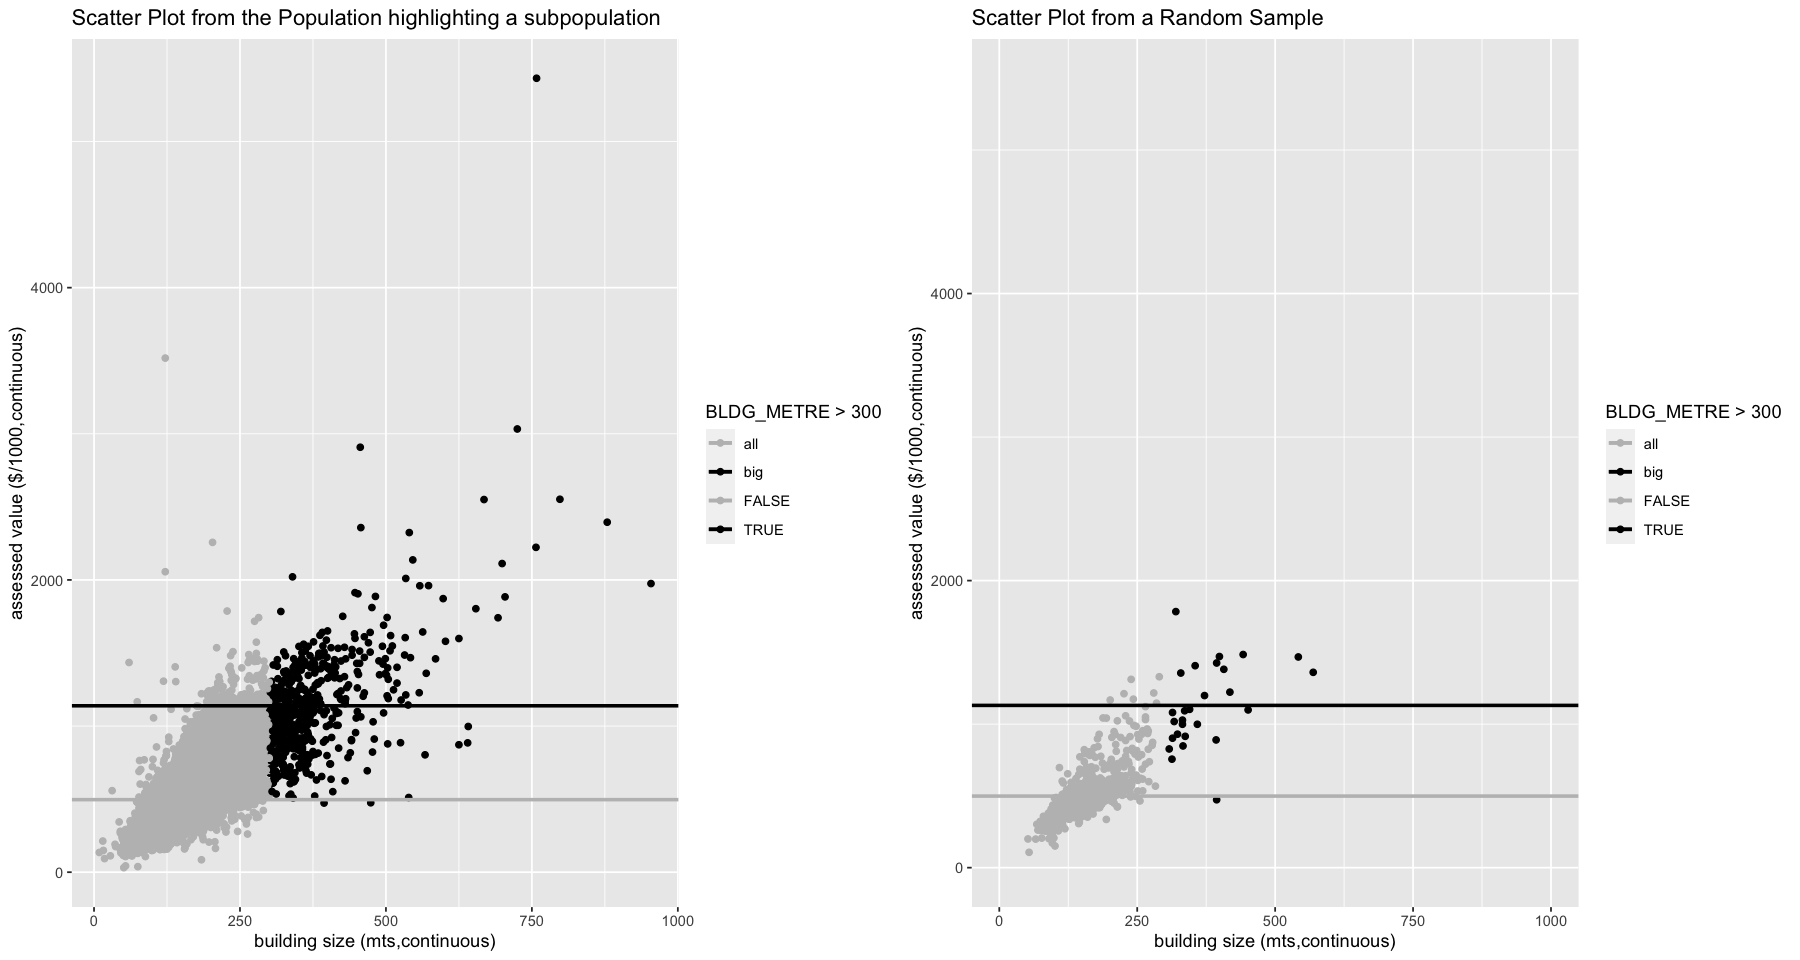

In [8]:
options(repr.plot.width=15, repr.plot.height=8)
sample_cond <- ggplot(data = dat_s, aes(BLDG_METRE, assess_val)) +
  xlab("building size (mts,continuous)") +
  ylab("assessed value ($/1000,continuous)") +
  ggtitle("Scatter Plot from a Random Sample") +
  geom_point(aes(x = BLDG_METRE, y = assess_val, colour = BLDG_METRE > 300)) +
  geom_hline(aes(yintercept = mean(assess_val), color = "all"), size = 1) +
  geom_hline(aes(yintercept = 1130.5, color = "big"), size = 1) +
  scale_color_manual(values = c("grey", "black", "grey", "black"))

grid.arrange(pop_cond, sample_cond + xlim(0,1000)+ ylim(0,5500), ncol = 2)

## 3.  conditional expectation `VS` size

$E[Y|X_1]$ and $X_1$

#### 1). One example

In [9]:
dat <- dat %>%
  mutate(BLDG_strata = factor(BLDG_METRE)) %>%
  group_by(BLDG_strata) %>%
  mutate(cond_avg = mean(assess_val))

dat %>%
  filter(BLDG_strata == 350) %>%
  select(cond_avg) %>%
  unique()

Adding missing grouping variables: `BLDG_strata`



BLDG_strata,cond_avg
<fct>,<dbl>
350,1161.667


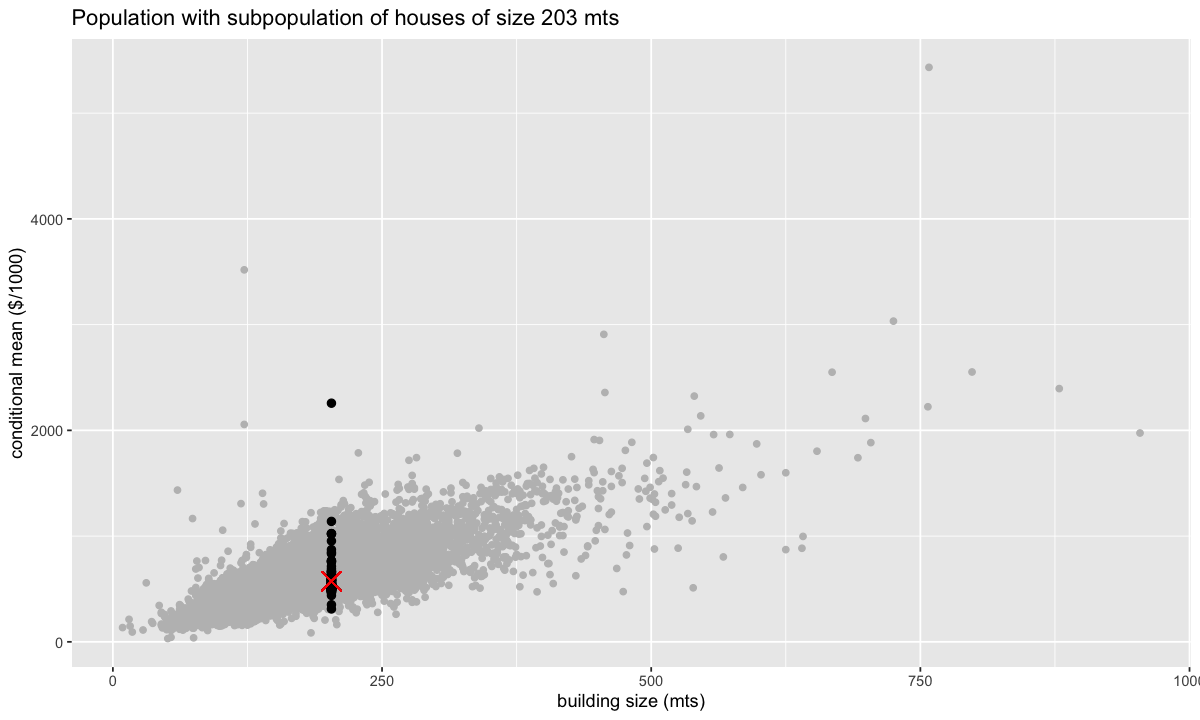

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)

houses_203 <- dat %>%
  ungroup() %>%
  filter(BLDG_METRE == 203)


dat %>% ggplot(aes(BLDG_METRE, assess_val)) +
  geom_point(color = "grey") +
  geom_point(data = houses_203, aes(BLDG_METRE, assess_val), color = "black", size = 2) +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  geom_point(data = houses_203, aes(BLDG_METRE, cond_avg), color = "red", size = 5, shape = 4) +
  ggtitle("Population with subpopulation of houses of size 203 mts")

#### 2). Compute all

> Let's visualize the relation between $E[Y|X_1]$ and $X_1$


- The red dots are <b><font color=salmon>the population *conditional* means: $E[Y|X_1=x]$ for *all* building size $x$ in the population</font></b>
- The <font color=salmon>conditional averages are <b>linearly related</b> to the size of the property</font>

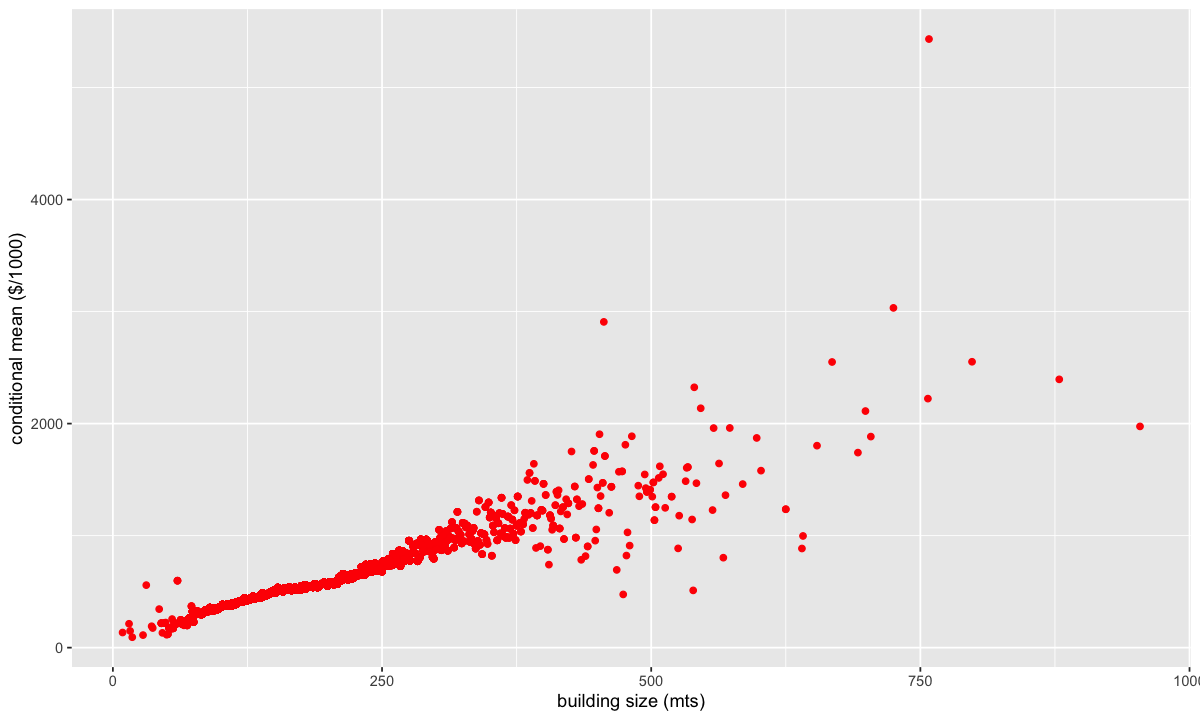

In [11]:
options(repr.plot.width = 10, repr.plot.height = 6)
dat %>% ggplot(aes(BLDG_METRE, cond_avg)) +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  geom_point(colour = "red")

#### 3). Regression Line

> - $E[Y|X_1] = \beta_0 + \beta_1 X_1 $
> - or $E[\text{value}|\text{size}] = \beta_0 + \beta_1 \text{size}$

<br>
    
<li><b><font color=LightSeaGreen>Slop $\beta_1$</font></b></li>

$\beta_1 = \frac {sd(y)}{sd(x)} \times corr(x, y)$

<li><b><font color=LightSeaGreen>Intercept $\beta_0$</font></b></li>

$\beta_0 = E[Y|X_1] - \beta_1 X_1 $

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8)

pop_coef <- dat %>%
  ungroup() %>%
  summarise(
    slope = cor(assess_val, BLDG_METRE) * sd(assess_val) / sd(BLDG_METRE),
    inter = mean(assess_val) - slope * mean(BLDG_METRE)
  )

pop_reg <- dat %>% ggplot(aes(BLDG_METRE, cond_avg)) +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  geom_point(color = "red") +
  geom_abline(intercept = pop_coef$inter, slope = pop_coef$slope, color = "blue", linetype = "dashed") +
  annotate("text", label = "Population Regression", x = 750, y = 2800, size = 8, colour = "blue")

In [13]:
pop_coef

slope,inter
<dbl>,<dbl>
2.56359,98.42471


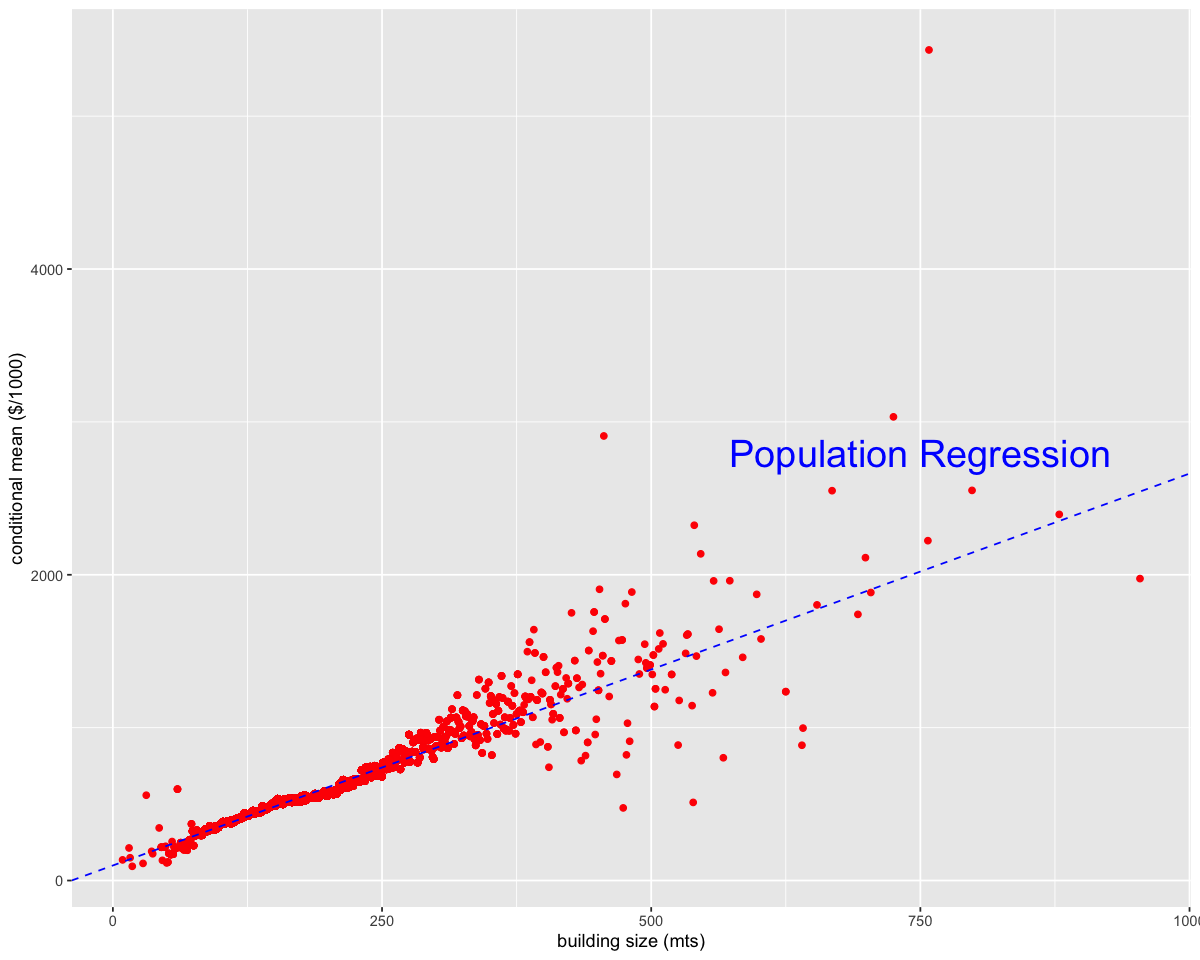

In [14]:
pop_reg

# Lecture 2: SLR with continuous or categorical covariates

> for a sample

<font color="red"> In general, we don't observe *all* the population but a random sample that we use to *estimate* the regression line </font>


In [15]:
dat <- read.csv("data/Assessment_2015.csv")
dat <- dat %>%
  filter(ASSESSCLAS == "Residential") %>%
  mutate(assess_val = ASSESSMENT / 1000)

## 1. Summary

We have discussed many quantities to predict the value of a property, $Y$:

- The expected value: $E[Y]$
- The conditional expected value: $E[Y|X_1]$ (you can also write $E[Y|X]$, $E[Y|\text{size}]$,  $E[\text{value}|\text{size}]$)
- The LR assuming that $E[Y|X_1] = \beta_0 + \beta_1 X_1$

> but these are all *population quantities* and in general $unknown$!!

> <font color="red"> We can use a random sample to estimate them!! </font> (see coming subsection)


## 2. Estimating with a random sample

#### 1). A random sample

#### <b><font color=LightSeaGreen>- Notation</font></b>
Let ${(X_{1i},Y_i): i = 1, \ldots , n}$ be a <font color="red">random sample</font> of size $n$ from the population

Then, $$Y_i = \beta_0 + \beta_1 X_{1i} + \varepsilon_i, \; E[\varepsilon_i|X_{1i}] = E[\varepsilon_i] = 0$$

For example, $Y_1, Y_2, \ldots, Y_n$ `VS` $X_{11}, X_{12}, \ldots, X_{1n}$

- we made this assumption for any pair of random variables from our population!
- note the use of the subscript $i$ to denote the $i$th experimental unit in our sample:

    - the $i$th house in our dataset
    - the $i$th patient in a medical study
    - the $i$th customer in an economics study
- the first subscript is part of the name of the explanatory variable. If you find that confusing, use another name. For example, $\text{size}_1$, $\text{size}_2$, $\ldots$, $\text{size}_n$; or $X_1, X_2, \ldots, X_n$
- note: subscripts can be written in a different order. You may find when people use matrix notation


#### <b><font color=LightSeaGreen>- The error term</font></b>

The error term, $\varepsilon_i$ contains all factors affecting $Y_i$ other than $X_{1i}$

We assume that these random errors are independent and identically distributed: <b><font color=salmon>IID assumption</font></b>
- as any other assumption, it may not hold or may not be a good assumption

Note that any distributional assumption made about the error term also affect the random variable $Y$
- for example, if you assume that $\varepsilon$ is a normal random variable, then $Y$ would also be normal

#### 2). Sample mean -> pop mean

Given a random variable $Y$, its best predictor is its expected value $E[Y]$

This population quantity (*usually unknown*) can be estimated with the <font color="red"> sample mean </font>

- sample mean --> $\bar{y}$

In [16]:
# Our sample
set.seed(561)
dat_s <- sample_n(dat, 1000, replace = FALSE)

In [17]:
# summary

dat %>% summarize(pop_avg_value = mean(assess_val), pop_sd_value = sd(assess_val))


dat_s %>% summarize(sample_avg_value = mean(assess_val), sample_sd_value = sd(assess_val))

pop_avg_value,pop_sd_value
<dbl>,<dbl>
496.4043,187.5873


sample_avg_value,sample_sd_value
<dbl>,<dbl>
498.669,188.7267


#### 3). Population vs Sample distribution of $Y$ 

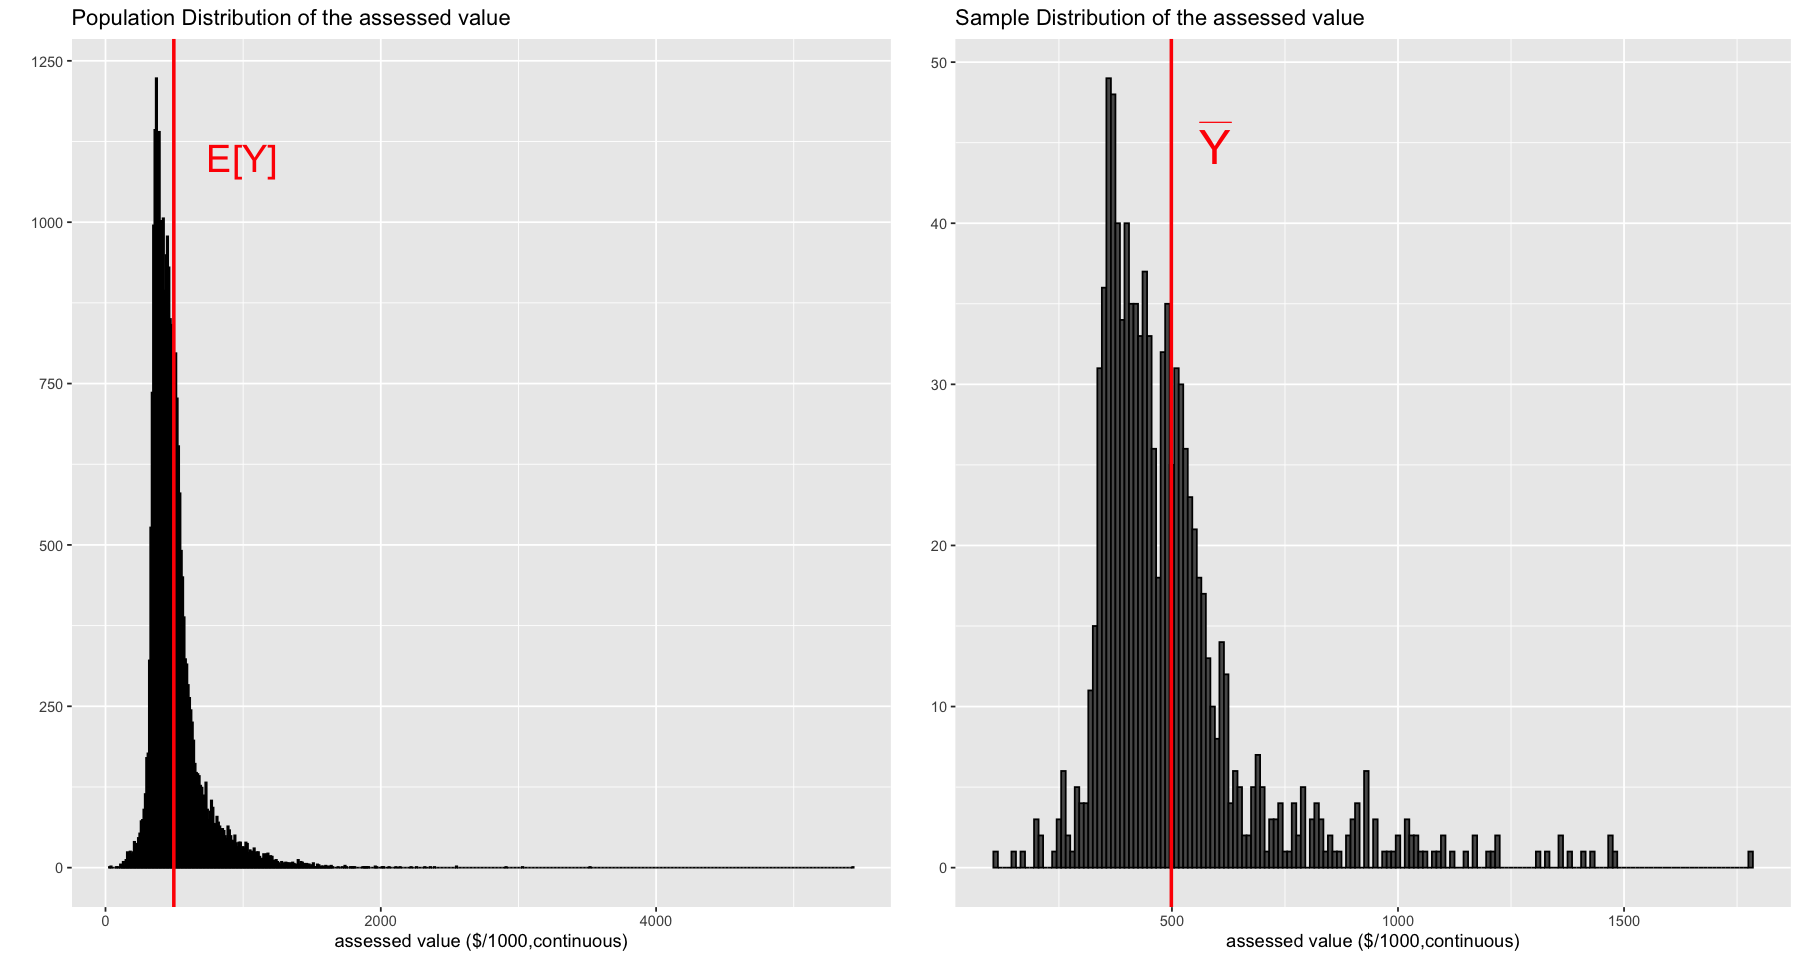

In [18]:
sample_hist <- qplot(dat_s$assess_val, geom = "histogram", binwidth = 10, color = I("black")) +
  geom_vline(aes(xintercept = mean(dat_s$assess_val)), col = "red", size = 1) +
  ggtitle("Sample Distribution of the assessed value") + xlab("assessed value ($/1000,continuous)") +
  geom_text(aes(x = mean(dat$assess_val) + 100, y = 45, label = TeX("$\\bar{\\Y}$", output = "character")), colour = "red", size = 10, parse = TRUE)

pop_hist <- qplot(dat$assess_val, geom = "histogram", binwidth = 10, color = I("black")) +
  geom_vline(aes(xintercept = mean(dat$assess_val)), col = "red", size = 1) +
  ggtitle("Population Distribution of the assessed value") + xlab("assessed value ($/1000,continuous)") +
  annotate("text", label = "E[Y]", x = mean(dat$assess_val) + 500, y = 1100, size = 8, colour = "red")

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(pop_hist, sample_hist, ncol = 2)

#### 4). conditional expectation

- <font color="red">Red points are the population conditional expectations.</font> 
- <font color="blue">Blue are the sample (conditional) means</font>. 
- <font color="grey">Grey points are points in the population and the sample, respectively</font>

In [19]:
dat <- dat %>%
  mutate(BLDG_strata = factor(BLDG_METRE)) %>%
  group_by(BLDG_strata) %>%
  mutate(cond_avg = mean(assess_val))

pop_reg <- dat %>% ggplot(aes(BLDG_METRE, cond_avg)) +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  geom_point(aes(BLDG_METRE, assess_val), color = "grey") +
  geom_point(color = "red") +
  ggtitle("Population and Population Conditional Expectations")

In [20]:
dat_s <- dat_s %>%
  mutate(BLDG_strata = factor(BLDG_METRE)) %>%
  group_by(BLDG_strata) %>%
  mutate(cond_avg = mean(assess_val))

sample_reg <- dat_s %>% ggplot(aes(BLDG_METRE, cond_avg)) +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  geom_point(aes(BLDG_METRE, assess_val), color = "grey") +
  geom_point(color = "blue") +
  ggtitle("Random Sample and Estimated Conditional Expectations")

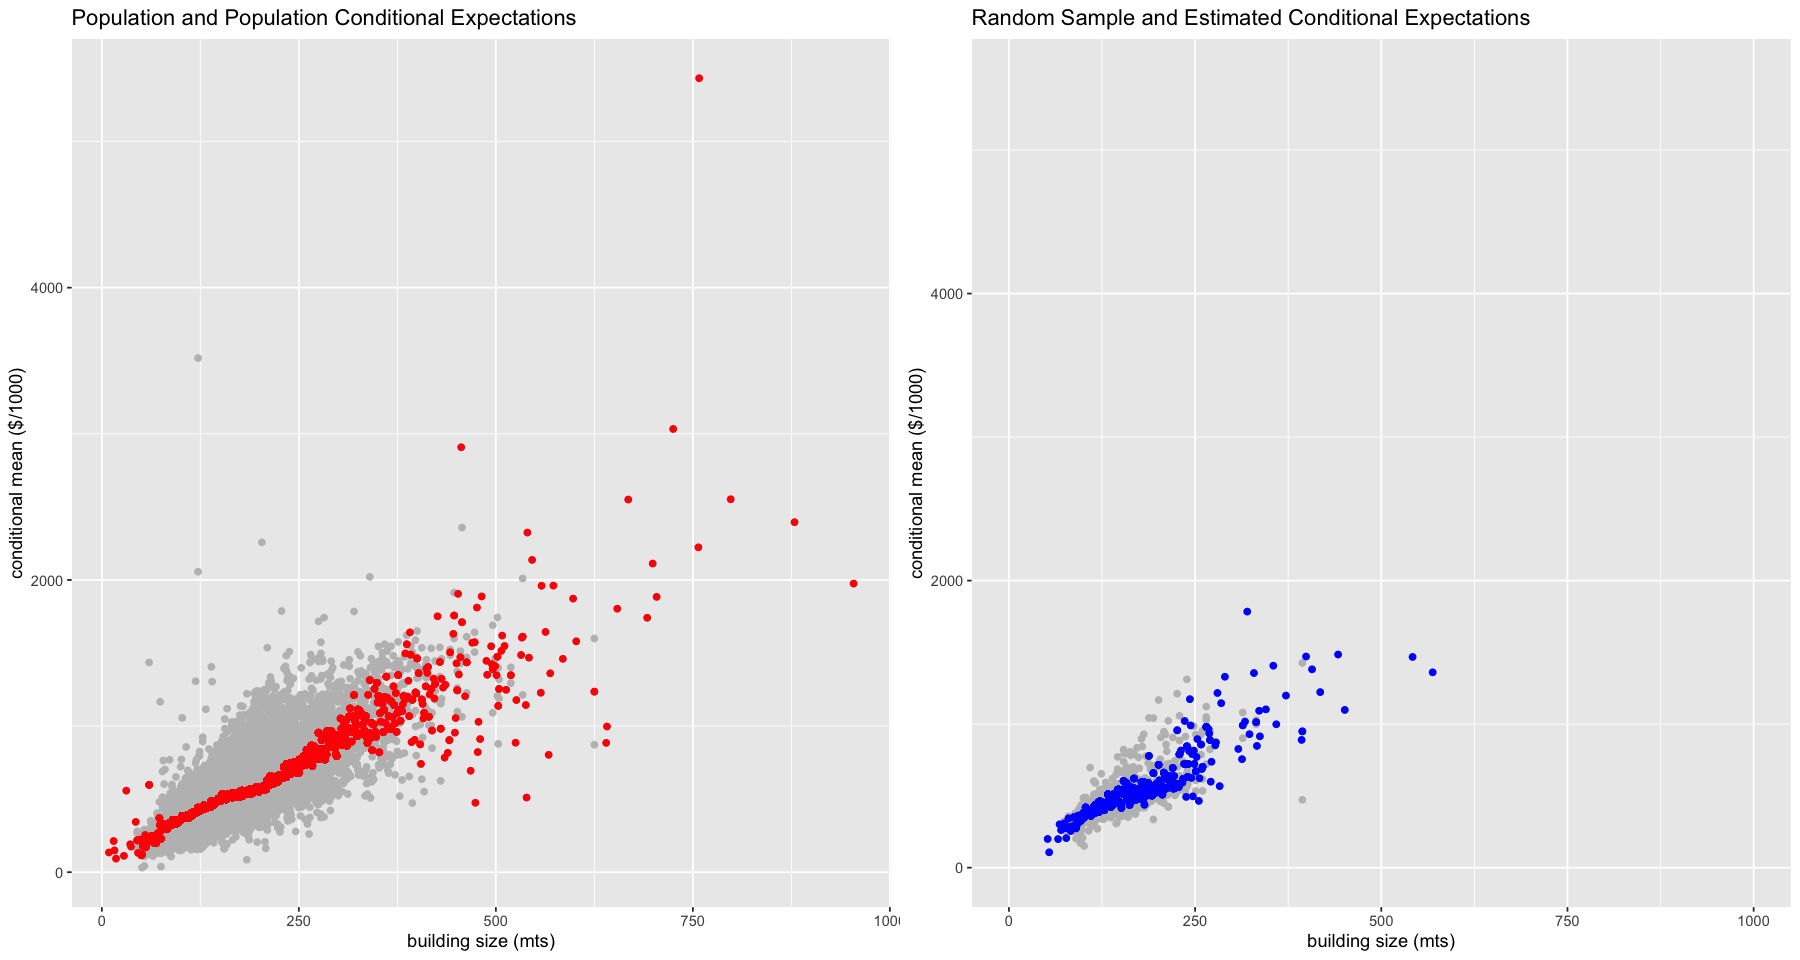

In [21]:
options(repr.plot.width=15, repr.plot.height=8)
grid.arrange(pop_reg, sample_reg + xlim(0,1000)+ ylim(0,5500), ncol = 2)

#### 5). Estimating the regression line

- We assume that the (population) conditional expectation is linear:  

$$E[Y|X_1] = \beta_0 + \beta_1 X_1 $$

or 

$$Y = \beta_0 + \beta_1 X_1 + \varepsilon, \; E[\varepsilon|X_1] = E[\varepsilon] = 0$$

- The population parameters $\beta_0$ and $\beta_1$ are usually *unknown*! 

-  <font color="red"> We use a random sample to *estimate* the regression line! </font>

##### **`geom_smooth`**


<b><font color=LightSeaGreen>a. Two possible predictions: conditional expectation *vs* regression</font></b>

**Additional remarks** 
The previous plot shows two possible methods to predict: 

- the conditional expectation
> The sample conditional expectations are represented by *blue points*. Each of these blue points is calculated based on only on a few points (see black points in the example below)
- the regression line
> - The regression line is estimated with *all* data. We use *all points* in our sample to estimate the intercept and the slope of the blue line (aka regression parameters). 
> - The regression line tells us how a change in an explanatory variable is **associated** with a change in the response


<b><font color=LightSeaGreen>b. The blue points are *estimates* of the conditional expectation $E[Y|X_1=x]$ for different values $x$</font></b>

- the more points we used the better the estimate   

<b><font color=LightSeaGreen>c. The blue line is also an *estimate* of the conditional expectation, which assumes that: $E[Y|X_1]=\beta_0 + \beta_1 X_1$ </font></b>

- The best estimate of this line is based on *all* points in the sample instead of a *subsample*

<b><font color=LightSeaGreen>d. We can think the LR as a smoother of the conditional expected values</font></b>

- this smoother is not unique. Think for example about KNN regressi
- `ggplot` included its visualization under `geom_smooth` together with other options of smoothers of the conditional means 

`geom_smooth()` using formula 'y ~ x'



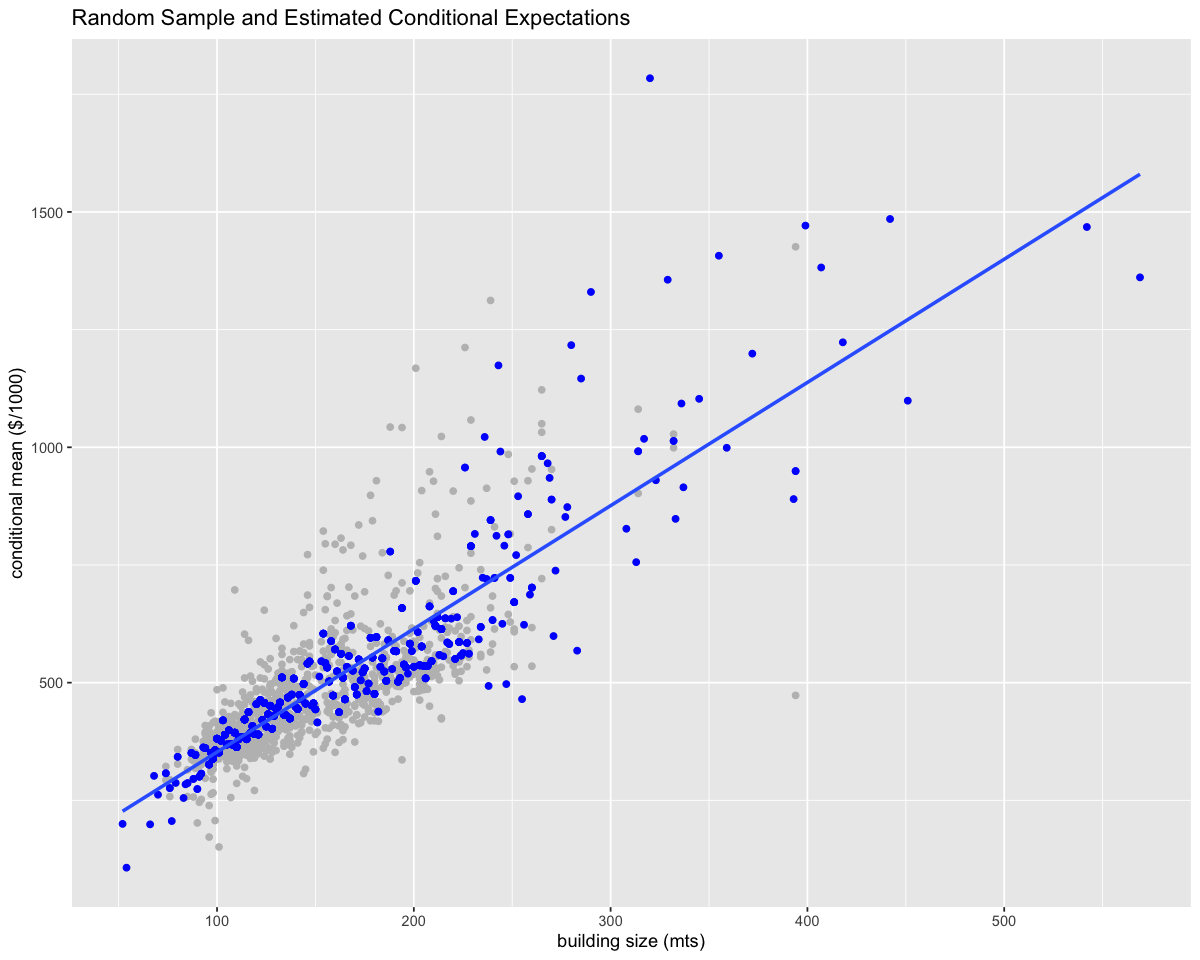

In [22]:
options(repr.plot.width = 10, repr.plot.height = 8)
sample_reg + geom_smooth(method = lm, se = FALSE)

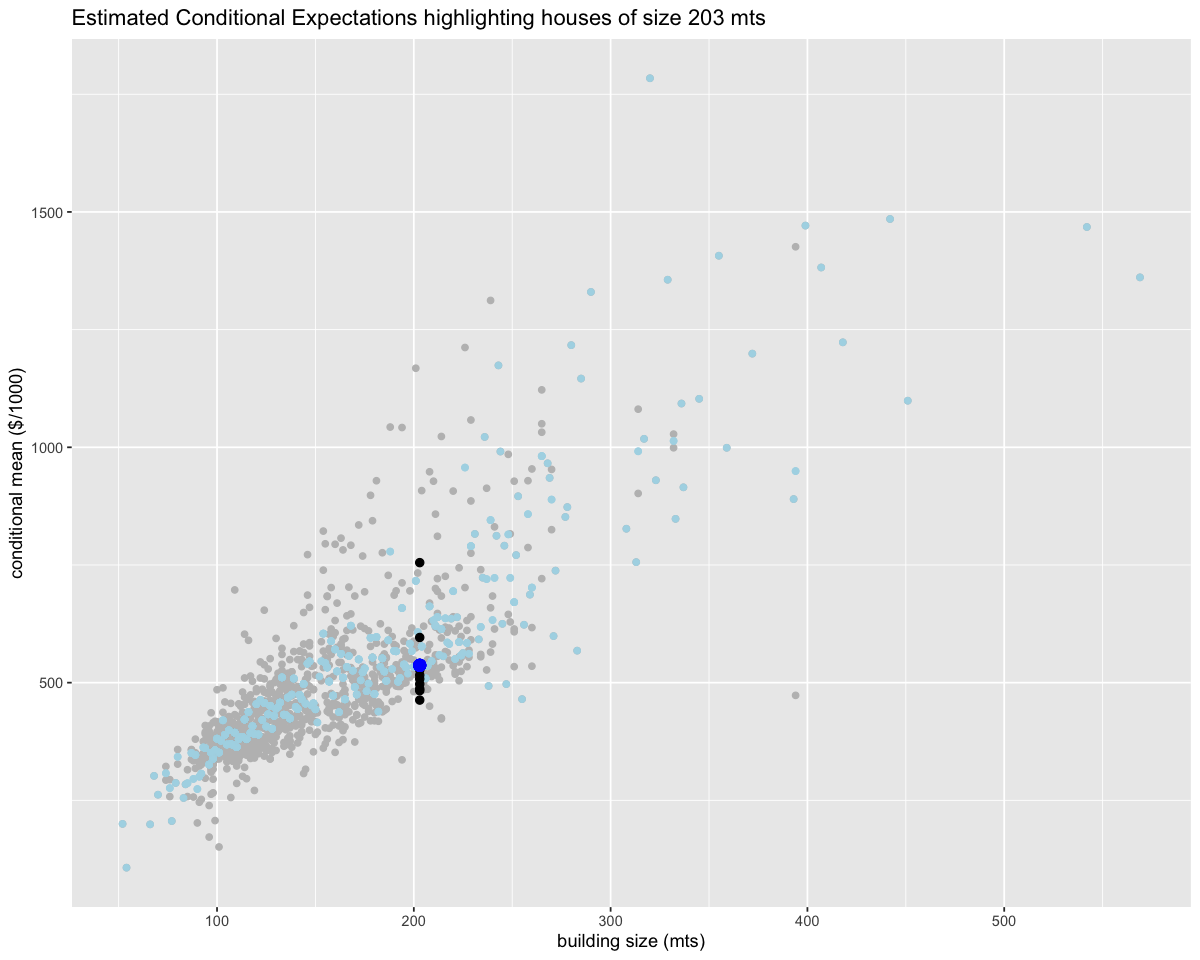

In [23]:
houses_203 <- dat_s %>%
  ungroup() %>%
  filter(BLDG_METRE == 203)

cond_exp <- dat_s %>% ggplot(aes(BLDG_METRE, cond_avg)) +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  geom_point(aes(BLDG_METRE, assess_val), color = "grey") +
  geom_point(color = "lightblue") +
  geom_point(data = houses_203, aes(BLDG_METRE, assess_val), color = "black", size = 2) +
  geom_point(data = houses_203, aes(BLDG_METRE, cond_avg), color = "blue", size = 3) +
  ggtitle("Estimated Conditional Expectations highlighting houses of size 203 mts")

cond_exp

#### 6). KNN

> kNN uses the mean of neighborhood points to predict

Adding missing grouping variables: `BLDG_strata`



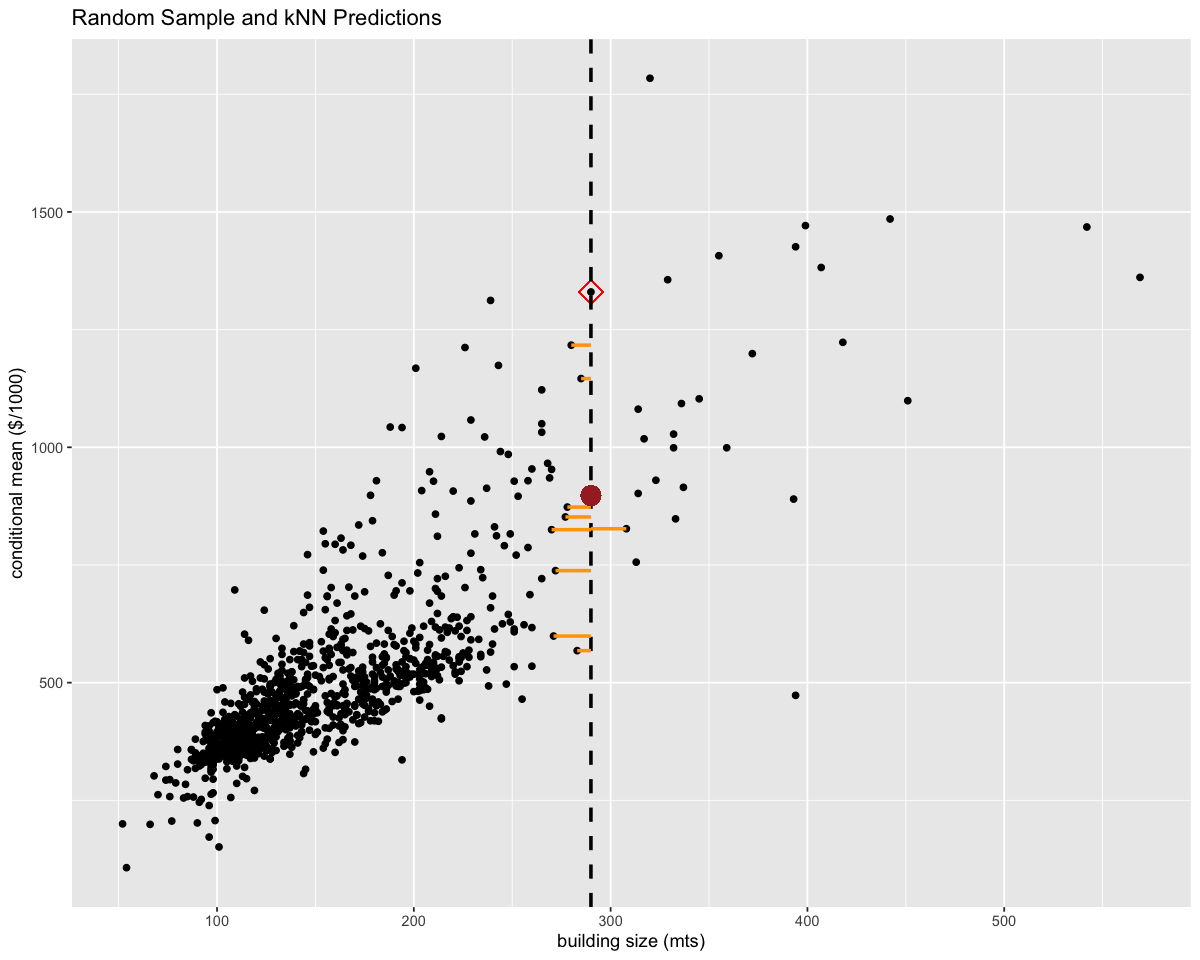

In [24]:
size_test <- dat_s %>% select(BLDG_METRE)
knn_pred <- knn.reg(
  train = dat_s$BLDG_METRE, # test = size_test,
  y = dat_s$assess_val, k = 10
)$pred

dat_knn <- dat_s %>%
  ungroup() %>%
  mutate(knn_pred = knn_pred)


knn_plot <- ggplot(dat_s, aes(BLDG_METRE, assess_val)) +
  geom_point() +
  xlab("building size (mts)") +
  ylab("conditional mean ($/1000)") +
  ggtitle("Random Sample and kNN Predictions")


# example of a neighbour

nearest_neighbours <- dat_s %>%
  ungroup() %>%
  mutate(diff = abs(290 - BLDG_METRE)) %>%
  arrange(diff) %>%
  head(10)

# knn predictions
prediction <- nearest_neighbours %>%
  summarise(predicted = mean(assess_val))

nearest_neighbours <- mutate(nearest_neighbours, threehund = rep(290, 10))
nn_plot <- knn_plot +
  geom_point(x = 290, y = 1330, size = 5, shape = 23, color = "red") +
  geom_vline(xintercept = 290, linetype = "dashed", size = 1) +
  geom_segment(
    data = nearest_neighbours,
    aes(x = threehund, xend = BLDG_METRE, y = assess_val, yend = assess_val), color = "orange", size = 1
  ) +
  geom_point(aes(x = 290, y = prediction[[1]]), color = "brown", size = 5)


nn_plot

`geom_smooth()` using formula 'y ~ x'



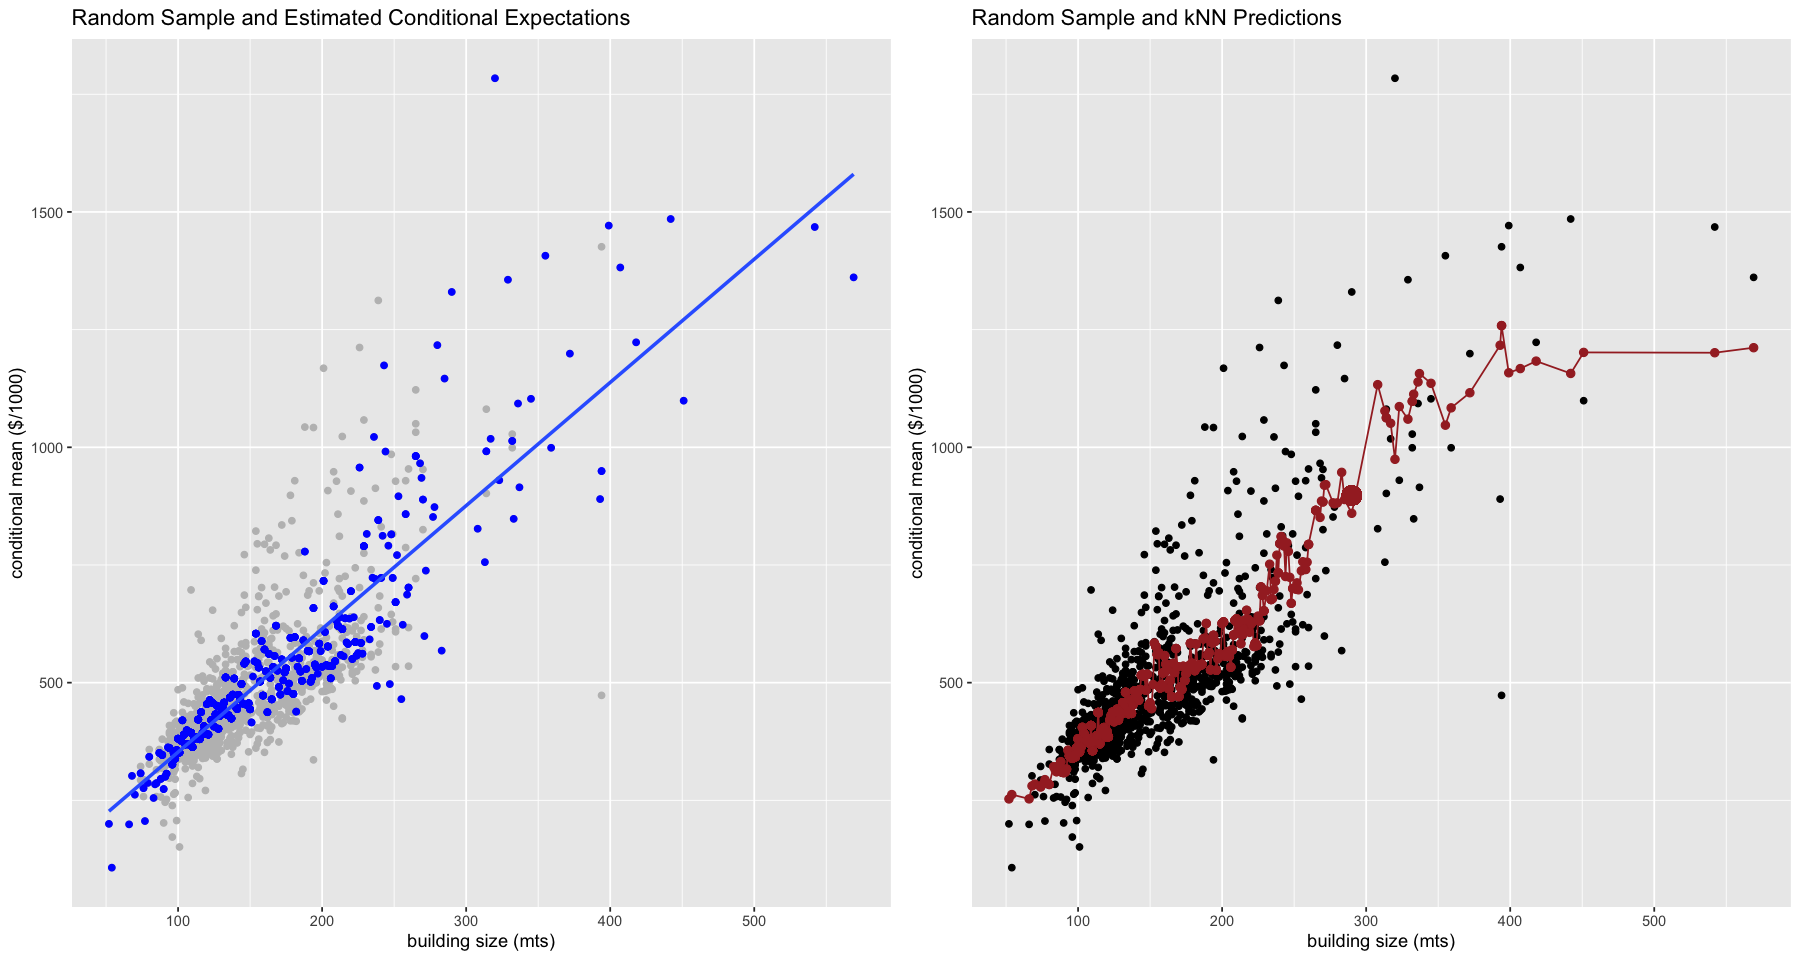

In [25]:
knn_plot <- knn_plot + geom_point(aes(x = 290, y = prediction[[1]]), color = "brown", size = 5) +
  geom_point(aes(x = BLDG_METRE, y = knn_pred), color = "brown", size = 2) +
  geom_line(data = dat_s, aes(x = BLDG_METRE, y = knn_pred), color = "brown")


options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(sample_reg + geom_smooth(method = lm, se = FALSE), knn_plot, ncol = 2)

## 3. Using R to estimate the LR



#### 1). `lm`

The formula in `lm` has the response variable before the `~` and the predictors after. In this case we have only one predictor (`BLDG_METRE`). 

> `lm(assess_val~.,data=dat_s)` uses all variables in the dataset, except the response, as predictors (not appropriate in our example) 

In [26]:
lm_s <- lm(assess_val ~ BLDG_METRE, data = dat_s)

tidy(lm_s) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,9.793,9.268,0
BLDG_METRE,2.618,0.059,44.514,0


In [27]:
lm_s


Call:
lm(formula = assess_val ~ BLDG_METRE, data = dat_s)

Coefficients:
(Intercept)   BLDG_METRE  
     90.769        2.618  


#### 2). Interpretation

#### <b><font color=LightSeaGreen>- The estimated slope</font></b>

The estimated slope: $\hat{\beta_1}=2.6$ measures the relationship between the assessed value and the size of a property

Interpretation:

- **Correct**: for every $SD$ that $X$ increases above the mean, $Y$ increases $\rho \times \text{SD}$ above its mean
- **Correct**: <font color=LightSeaGreen>A change of 1 metre in size <b>is associated</b> with a $2,600 change in assessed value!</font>

- **Wrong**: *The effect* of 1 meter increase in the size of a property is a $2,600 increase in the assessed value 

- **Wrong**: A 1 meter increase in the size of a property *caused* a $2,600 increase in the assessed value 

- **Correct but unrealistic**: <font color="red"> Holding the all factors in $\varepsilon$ fixed </font>, the expected  *effect* of 1 meter increase in the size of a property is a $2,600 increase in the assessed value 

>  <font color="red"> Important: we don't know if the change in size *caused* the change in value and we can't isolate the *effect* of size (*holding other factors fixed*) from observational data </font>
    
Math notation:     
- Slop can be proved mathematically that

<br><font color=salmon>
$$\hat{\beta}_1=\frac{r_{XY}s_Y}{s_X}=\frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sum_{i=1}^n(X_i-\bar{X})^2}$$
</font><br>
    
- This is the sample version of the population parameter $\beta_1 = \rho \frac{\sigma_Y}{\sigma_{X_1}}$, where $\rho = cor(X,Y)$ and $\sigma$ are standard deviations

> Plug-in estimators: people have suggested other estimators of the mean and the covariance to plug-in
    
<br>   
    
#### <b><font color=LightSeaGreen>- The estimated intercept</font></b>

The estimated intercept: $\hat{\beta}_0=90.8$ measures the expected assessed value for a property of size 0 mts. 

- We are not usually interested in this parameter
- We can't even think of it as the value of the land, it's really an interpolated value of our model
- Note that if the predictor is centered, $X_{1i}-\bar{X}_1$, then the intercept represents the value of a property of average size.
- However, it is important to include an intercept in the LR!! 
    - a modified analysis is needed otherwise (see Ch. 2.6 from Wooldridge)
> <font color="red"> Important: many statistical properties do not hold for models without intercept! </font>
We'll soon work on a real example that run into this problem
    
Mathematically: 

<br><font color=salmon>
$$\hat{\beta}_0=\bar{Y} - \hat{\beta}_1 \bar{X_1}$$
</font><br>

- we use a "bar" to denote the mean, sample average, of the variable 


This is also the sample version of the population parameter $\beta_0 = E[Y] - \beta_1 E[X_1]$

#### 3). By hand

In [28]:
mu_x <- mean(dat_s$BLDG_METRE)
mu_y <- mean(dat_s$assess_val)
s_x <- sd(dat_s$BLDG_METRE)
s_y <- sd(dat_s$assess_val)
r <- cor(dat_s$BLDG_METRE, dat_s$assess_val)

my_intercept <- mu_y - r * s_y / s_x * mu_x
my_slope <- r * s_y / s_x

data.frame(lm_est = lm_s$coef, my_est = c(my_intercept, my_slope))

,lm_est,my_est
,<dbl>,<dbl>
(Intercept),90.768749,90.768749
BLDG_METRE,2.617547,2.617547


## 4. SLR with categorical predictors

- `FIREPLACE` : Y or N

- `value`

#### 1). Dummy Variable

> The variable `FIREPLACE` is not numeric, so we can't include it as is in a mathematical formula. We need an auxiliary variable: a dummy variable!!


#### <b><font color=LightSeaGreen>- The dummy variable:</font></b>

$$X_2 = \left\{ \begin{array}{ll}
         1 & \text{if FIREPLACE = Y};\\
         0 & \text{if FIREPLACE = N}\end{array} \right.$$
         

> <font color="red">This auxiliary variable is numeric variable! so we can include it in a LR</font> 

<br>


#### <b><font color=LightSeaGreen>- A LR with dummy variables</font></b>

$$E[Y|X_2]=\beta_0 + \beta_2 X_2$$ 

- if FIREPLACE = N: $E[Y|X_2=0]=\beta_0$

- if FIREPLACE = Y $E[Y|X_2 = 1]=\beta_0 + \beta_2$

- Then
<font color=LightSeaGreen>
$$\beta_2 = E[Y|X_2=1]-E[Y|X_2=0]=\mu_1 - \mu_0$$
$$\beta_0 = \text{intercept}$$
</font> 


> <font color="red"> $H_0: \beta_2=0$ is the same as the $t$-statistic in the $t$-test!!</font> 
> Note: The intercept of this line is not the same as the one of the other line, just the same name

#### 2). Code

> in DSCI 552

In [29]:
t.test(assess_val~FIREPLACE,dat_s,var.equal=T) %>% tidy()

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-144.4057,380.9784,525.384,-9.835285,7.518641e-22,998,-173.2176,-115.5937,Two Sample t-test,two.sided


> in DSCI 561


##### In R: the `lm` function does all the work for you *if* you indicate which variables are categorical!!

> - It is important to set categorical variables as "factors"
> - You can choose your reference group in R
> - Check the variable created by `lm` with matrix.design()`

In [30]:
lm_F <- lm(assess_val ~ FIREPLACE, dat_s)

tidy(lm_F)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),380.9784,13.25489,28.742479,7.465131e-133
FIREPLACEY,144.4057,14.68241,9.835285,7.518641e-22


In [31]:
lm_fire <- lm(assess_val ~ FIREPLACE, dat_s)
model.matrix(lm_fire) %>% head()

,(Intercept),FIREPLACEY
1,1,1
2,1,1
3,1,0
4,1,0
5,1,1
6,1,1


#### 3). Interpretation

- The estimated *intercept*, $\hat{\beta}_0=380.98$, is the <b><font color=salmon>average</font></b> assessed value for properties without a fireplace!!

> It is the sample version of the conditional expectation (mean of the reference group)

- The estimated *slope*,  $\hat{\beta}_2=144.41$ , is the <b><font color=salmon>difference</font></b> between the two sample averages!!

> It is the sample version of the difference of the conditional expectations (or group means)

# **Lecture 3: estimation, inference and prediction in SLR**

In [32]:
dat <- read.csv("data/Assessment_2015.csv")
dat <- dat %>% filter(ASSESSCLAS=="Residential")  %>% 
        mutate(assess_val = ASSESSMENT / 1000)

# Our sample
set.seed(561)
dat_s <- sample_n(dat, 1000, replace = FALSE)

## 1. Estimators of regression coefficients

We used the `lm` function in R to estimate a simple linear regression to model `assess_val` and `BLDG_METRE` from a random sample

> Note: `lm` estimates the regression coefficients using a method called <b><font color=salmon>least squares (LS)</font></b>. We'll see later the benefits of this estimator and how to compute it
> - **pro**: least square estimates are <b><font color=salmon>unbiased</font></b> (if take many samples, our estimate is fine on average)
> - **cons**: 
>     - <b><font color=salmon>very sensitive to outliers</font></b> (one outlier can change the regression line because LS needs to avoid the residual for the outlier to be really big. see [animation](https://setosa.io/ev/ordinary-least-squares-regression/). Having an outlier can result in larger error)
>     - unstable when explanatory variables are correlated (collinear variables / multicollinearity)
>     - unstable when we don't have enough observations in our sample, but we do have a lot of explanatory variables. (we cannot even compute it when #observations < #variables)
<center>
<img src="img/coef_table.png" style="width:400px"/>
</center>

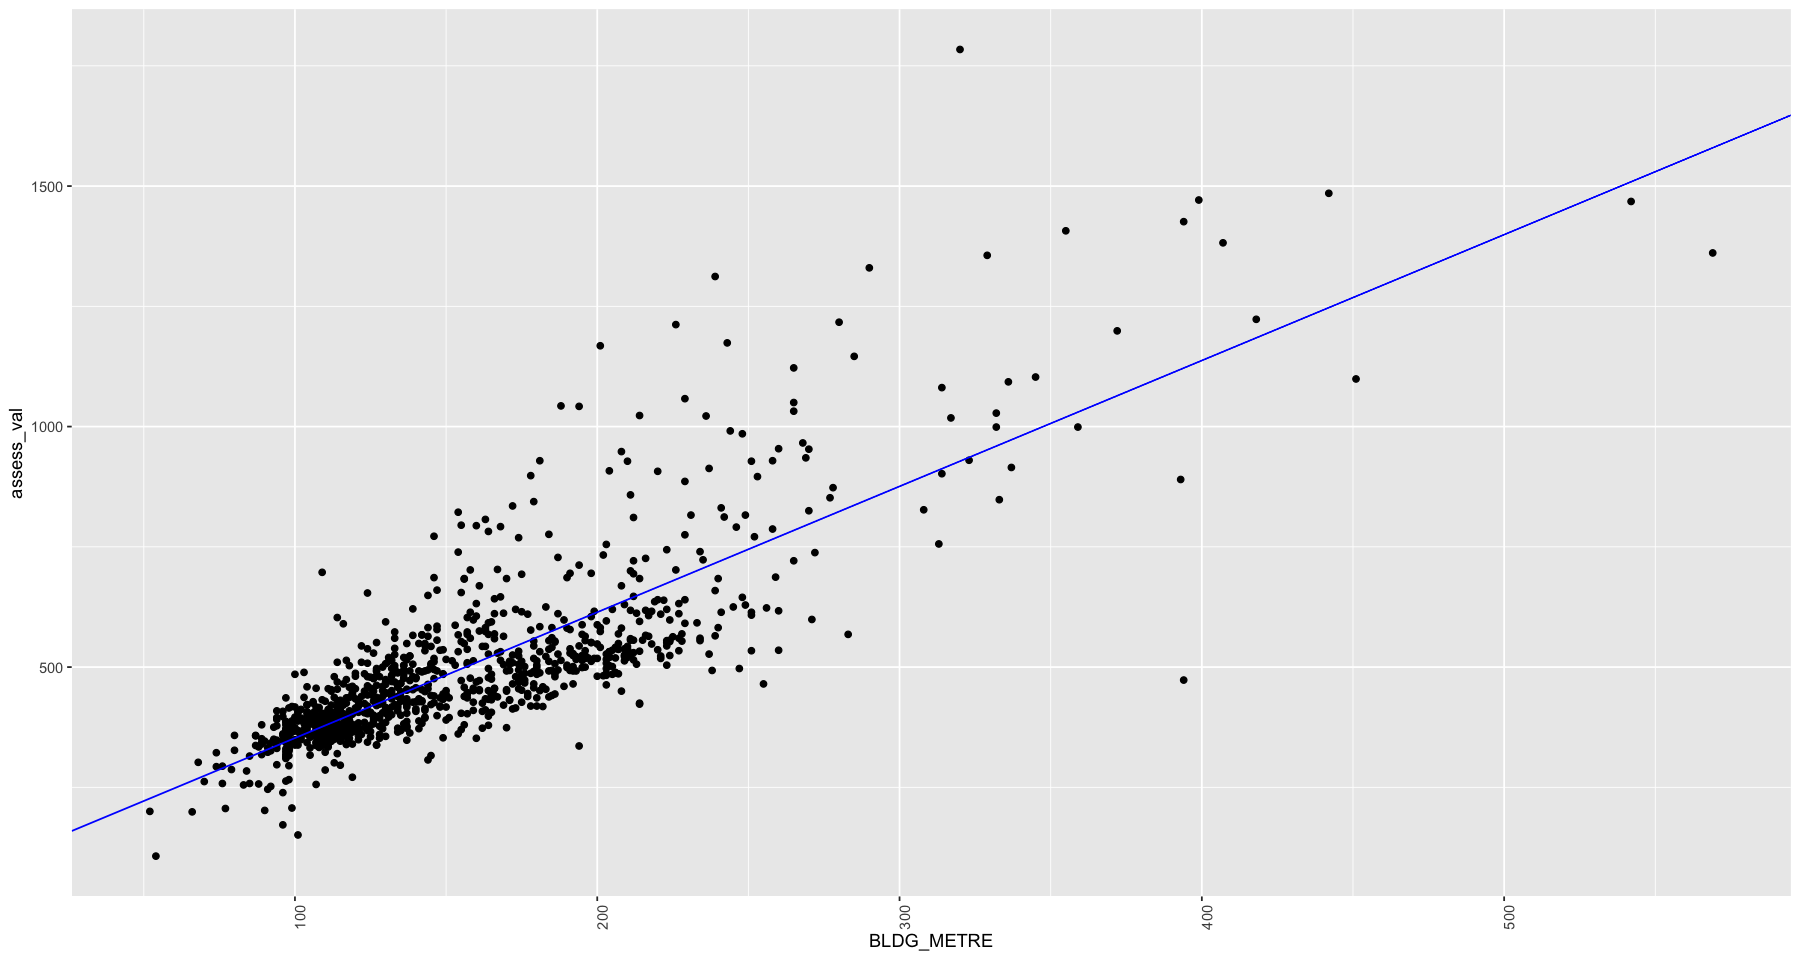

In [33]:
lm_s <- lm(assess_val ~ BLDG_METRE, data = dat_s)


dat_s %>% ggplot(aes(BLDG_METRE, assess_val)) +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_point() +
  geom_abline(intercept = coef(lm_s)[1], slope = coef(lm_s)[2], col = "blue")

## 2. Measure Uncertainty in the estimation

#### <b><font color=LightSeaGreen>We estimate the regression line using sample estimators of the mean, sd, and correlation</font></b>



<br>


> Today we will focus on measuring the uncertainty of our estimates and making inference about the population coefficients

- The first column has the names of the coefficients 
- The second column of the table shows the values of the *estimated* coefficients of the regression line (see lect02 for interpretations)
- The last 3 columns has important quantities to assess uncertainty and test hypotheses about the coefficients

In [34]:
lm_s <- lm(assess_val ~ BLDG_METRE, data = dat_s)


coef_table <- tidy(lm_s) %>% mutate_if(is.numeric, round, 3)
coef_table

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,9.793,9.268,0
BLDG_METRE,2.618,0.059,44.514,0


#### 1). The standard errors

#### <b><font color=LightSeaGreen>Definition</font></b>

- The standard error of an estimator measures its expected variation due to random variation in the sample
- <font color="red">  In practice, we can't do this since we only see *one random sample* and *not the population*!! </font>

#### <b><font color=LightSeaGreen>Why do we need to compute the standard error??</font></b>
- Our estimates are based on (a realization of) only one random sample!! 
- we would obtain very different estimates from a different sample.
- So we can (should) <b><font color=LightSeaGreen>measure their uncertainty</font></b> using 
    - standard errors
    - even compute confidence intervals!!

In [35]:
dat_s2 <- sample_n(dat, 1000, replace = FALSE)

lm_s2 <- lm(assess_val ~ BLDG_METRE, data = dat_s2)

In [36]:
tidy(lm_s)
tidy(lm_s2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.768749,9.79347555,9.268288,1.132776e-19
BLDG_METRE,2.617547,0.05880332,44.513599,2.897913e-239


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),87.196032,10.65644914,8.182466,8.415871e-16
BLDG_METRE,2.628288,0.06251909,42.039765,4.292535e-223


#### 2). Review: Bootstrap

<center>
<img src="img/boot.png" style="width:300px"/>
</center>

#### <b><font color=LightSeaGreen>The sampling distribution</font></b>

$\hat \beta_0$ and $\hat \beta_1$ are estimators of the true population coefficients

> these are functions of the random sample, so they are also *random variables*!!

As any other random variable, they have a distribution: the *sampling distribution*!!

> - We will see later in the course that in many cases we can assume that the sampling distribution is the Normal distribution
> - It is not a coincidence that these distributions have a bell shape. 
> - As for other estimators in Statistics, it can be proved that under certain conditions, the sampling distribution of the regression coefficients is *asymptotic Normal*

<font color="blue"> ---> Can we use some of our previous results?? </font>


In [37]:
N <- 1000
B <- 1000

lm_boot <- replicate(B, {
  sample_n(dat_s, N, replace = TRUE) %>%
    lm(assess_val ~ BLDG_METRE, data = .) %>%
    .$coef
})

lm_boot <- data.frame(boot_intercept = lm_boot[1, ], boot_slope = lm_boot[2, ])

head(lm_boot)

,boot_intercept,boot_slope
,<dbl>,<dbl>
1,89.96116,2.624339
2,84.82347,2.675325
3,88.56860,2.622584
4,96.21816,2.576822
5,92.56241,2.631388
6,97.61145,2.568440


##### bootstrap estimate `VS` `lm` result

**`lm` result VS bootstrap estimate (mean) for $\beta_0$ and $\beta_1$**

- `lm` estimates are close to their estimated mean
> this is expected since least square estimates are unbiased!

- `lm` standard errors are not so close to those estimated by bootstrapping (lm se < bootstrap se)
> - asymptotic assumptions may not be good in our case
> - Lm se comes from asymptotic theory (not very good )
> - Trust bootstrap se

In [38]:
data.frame(
    coef_table %>% select(estimate), 
    coef_table %>% select(std.error),
    B_avg = lm_boot %>% summarize(intercept = mean(boot_intercept), slope = mean(boot_slope)) %>% unlist(),
    B_se = lm_boot %>% summarize(intercept = sd(boot_intercept), slope = sd(boot_slope)) %>% unlist()
)

,estimate,std.error,B_avg,B_se
,<dbl>,<dbl>,<dbl>,<dbl>
intercept,90.769,9.793,90.324410,14.1221615
slope,2.618,0.059,2.621205,0.1039955


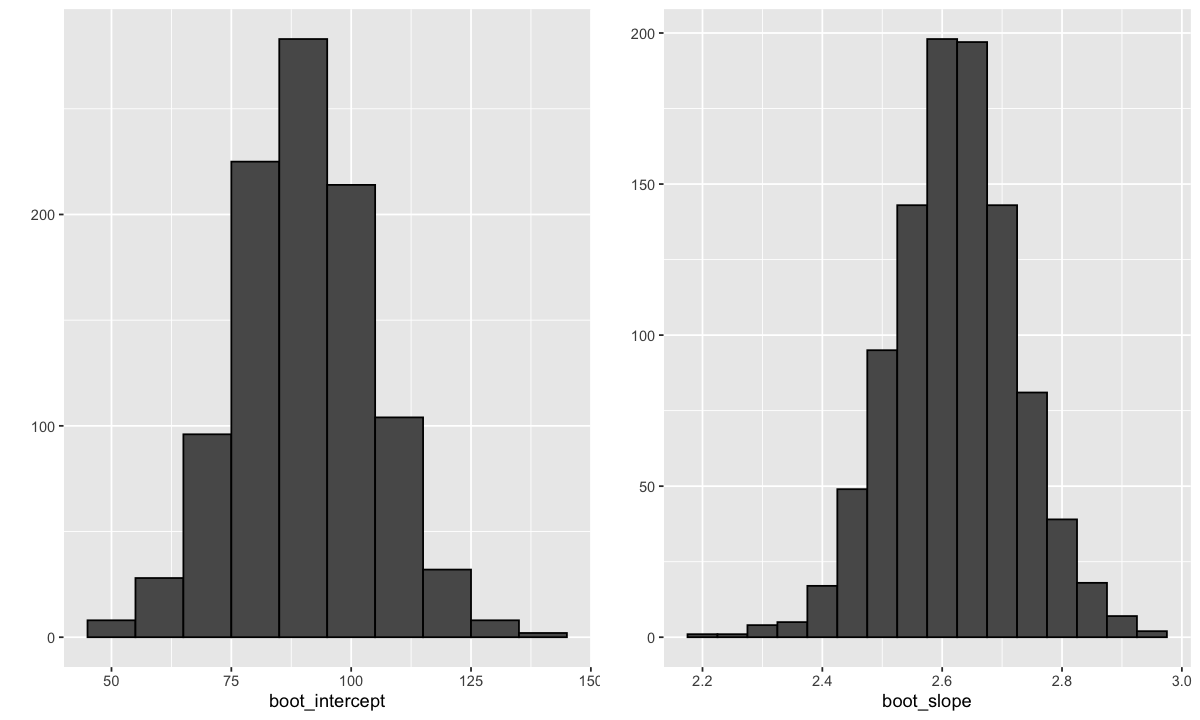

In [39]:
# from bootstrapping
B_hist_int <- qplot(boot_intercept, data = lm_boot, geom = "histogram", binwidth = 10, color = I("black"))
B_hist_slope <- qplot(boot_slope, data = lm_boot, geom = "histogram", binwidth = 0.05, color = I("black"))


# draw beta0 and beta1 distribution
options(repr.plot.width=10, repr.plot.height=6)
grid.arrange(B_hist_int,B_hist_slope, ncol=2)

#### 3). Confidence intervals using Bootstrap

> Since we know the population in this case, we can also *resample* from it. However in practice resampling from the population is not feasible. We only observe one sample from it!

<br>

***CI using bootstrapping*** (CI covers the true population parameter with 95% probability by using the sampling distribution.)

We can also use the repeated estimates from bootstrapping to construct confidence intervals!

   > We computed bootstrap SE and a bootstrap sampling distribution!
    
Let's focus on the slope here.

There are 2 type of bootstrap CI: 

1. <b><font color=LightSeaGreen>Bootstrap-normal-theory CI:</font></b> Assumes that the estimator $\hat{b}$ follows a **Normal distribution** but uses the bootstrap standard error (SE$^*(\hat{b})$) to construct CI

### $$\hat{b} \pm z_{\alpha/2}\text{SE}^*(\hat{b})$$

2. <b><font color=LightSeaGreen>Bootstrap-percentile CI:</font></b> Assume **large sample size**. Uses percentiles from the bootstrap sampling distribution 

### $$(\hat{b}^*_{\alpha/2}, \hat{b}^*_{1-\alpha/2})$$



<center>
<img src="img/CIs.png" style="width:300px"/>
</center>

##### 1. bootstrap-normal-theory CI


<center>
<img src="img/ci1.png" style="width:300px"/>
</center>

The **bootstrap-normal-theory CI** is $(2.418, 2.818)$

In [40]:
slope_s <- coef_table %>%
  filter(term == "BLDG_METRE") %>%
  pull(estimate)

slope_B <- lm_boot %>%
  select(boot_slope) %>%
  unlist()

slope_s + qnorm(0.025) * sd(slope_B)
slope_s - qnorm(0.025) * sd(slope_B)

[1] 2.414173

[1] 2.821827

##### 2. bootstrap-percentile CI


<center>
<img src="img/ci2.png" style="width:300px"/>
</center>

The **bootstrap-percentile CI** is $(2.413,2.809)$

2.5% 
2.419885

97.5% 
2.825717

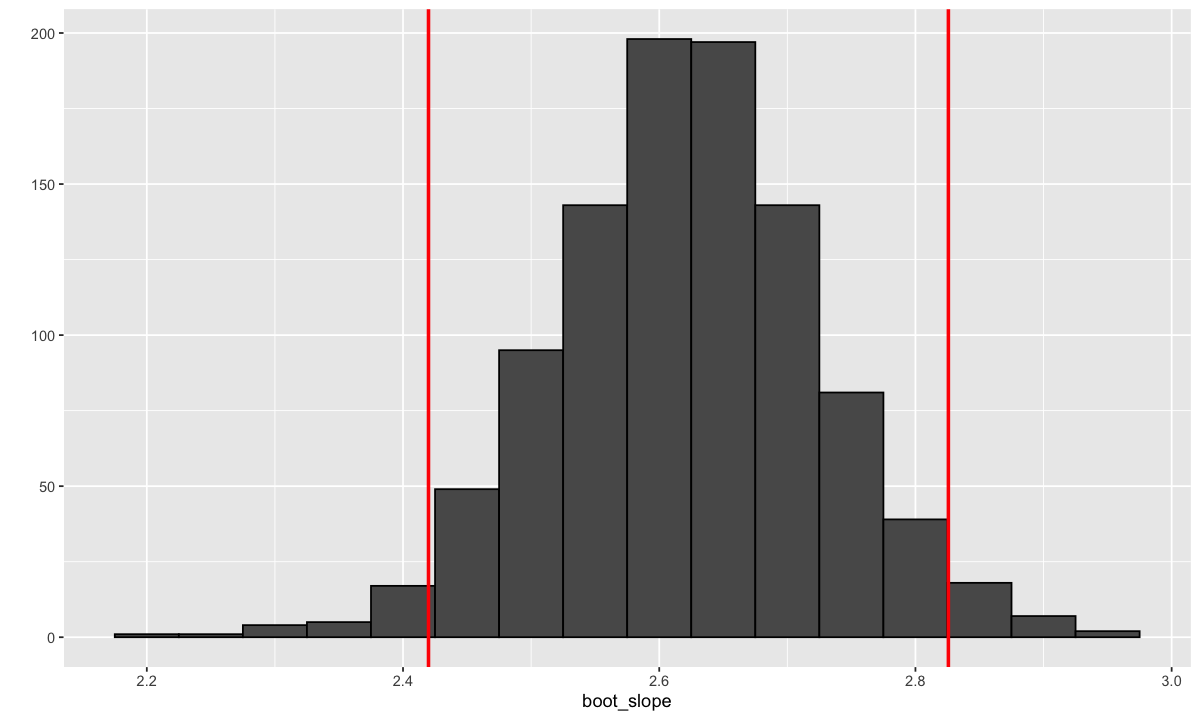

In [41]:
B_hist_slope + geom_vline(aes(xintercept = quantile(slope_B, 0.025)), col = "red", size = 1) +
  geom_vline(aes(xintercept = quantile(slope_B, 0.975)), col = "red", size = 1)


quantile(slope_B, 0.025)
quantile(slope_B, 0.975)

##### 3. ***`lm` CI - classical CI*** (using asymptotic theory)

The `lm` function uses results from asymptotic theory to construct confidence intervals

> **Mathematical result**: if $\hat{b}$ follows a Normal distribution and estimating the $SE(\hat{b})$, classical CI are computed using the $t$-distribution with $n-p$ degrees of freedom (df), where $n$ is the sample size and $p$ the number of parameters (in our case $p=2$, we will cover more on this topic next week)

In [42]:
tidy(lm_s, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.768749,9.79347555,9.268288,1.132776e-19,71.550582,109.98692
BLDG_METRE,2.617547,0.05880332,44.513599,2.897913e-239,2.502155,2.73294


##### 4. Interpretation

- The probability that the range/interval covers the true population parameter $\beta_0$ or $\beta_1$ is 95%.
- We are 95% confident that the true parameter is in that range.

## 3. Prediction using the estimated regression

<b><font color=LightSeaGreen>regression line</font></b>

The blue dot, <font color="blue"> $\hat{y}$ </font> in the line, is the *predicted* assessed value for a house of size 320 (on the estimated regression line) 

$$ \hat{y}_i=90.769 + 2.618 * x_{i}$$

> we put a "hat" on $y$ to indicate that it's a predicted value using the regression line 


<b><font color=LightSeaGreen>random variable</font></b>

The predictor is also a *random variable* since it's a function of the estimated coefficients!!

$$ \hat{y}_i=\hat{\beta_0} + \hat{\beta_1} * x_{i}$$


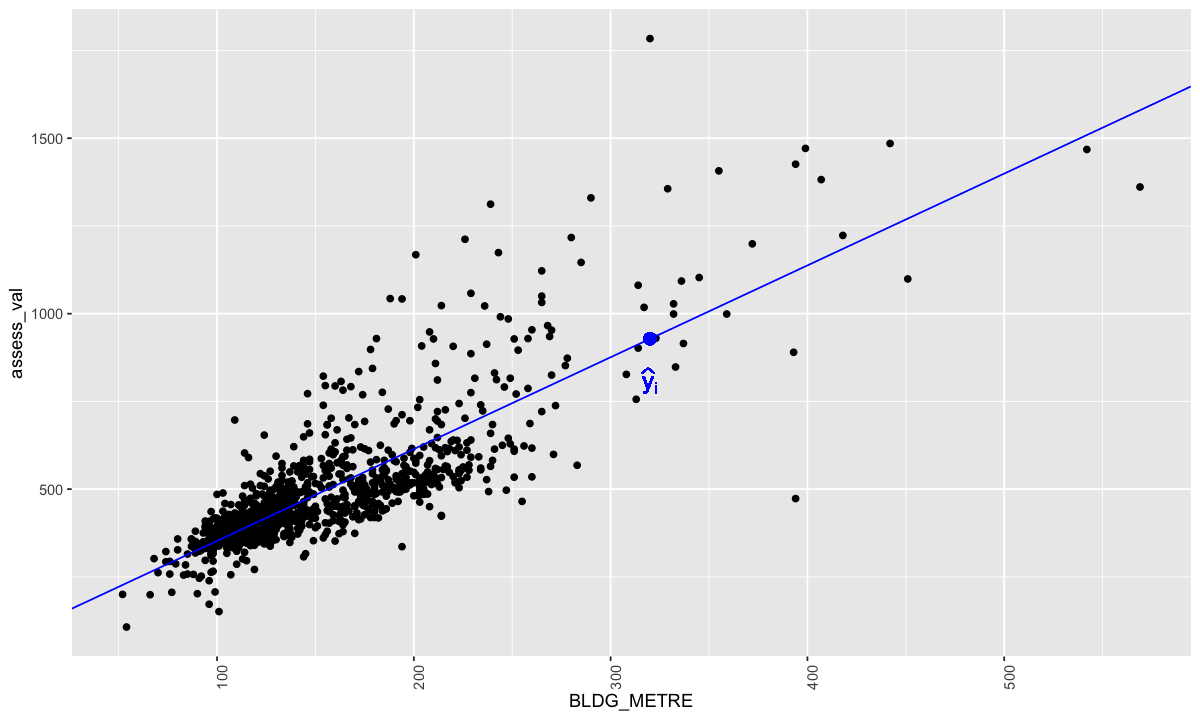

In [43]:
dat_s %>% ggplot(aes(BLDG_METRE, assess_val)) +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_point() +
  geom_abline(intercept = coef(lm_s)[1], slope = coef(lm_s)[2], col = "blue") +
  geom_point(aes(x = 320, y = predict(lm_s, data.frame(BLDG_METRE = 320))), color = "blue", size = 3) +
  geom_text(aes(x = 320, y = predict(lm_s, data.frame(BLDG_METRE = 320)) - 120, label = TeX("\\widehat{y}_i", output = "character")), color = "blue", size = 5, parse = TRUE)

#### 1). `predict(lm_s, se.fit = TRUE)`

> Same `residual.scale` because LM assumes that error term is iid


<center>
<img src="img/residual1.png" style="width:300px"/>
</center>

<center>
<img src="img/residual2.png" style="width:300px"/>
</center>

In [44]:
y_hat <- as.data.frame(predict(lm_s, se.fit = TRUE))
head(y_hat)

,fit,se.fit,df,residual.scale
,<dbl>,<dbl>,<int>,<dbl>
1,666.6292,5.116616,998,109.2816
2,344.6708,4.889902,998,109.2816
3,323.7305,5.233297,998,109.2816
4,381.3165,4.346574,998,109.2816
5,514.8114,3.474764,998,109.2816
6,509.5763,3.464465,998,109.2816


`geom_smooth()` using formula 'y ~ x'



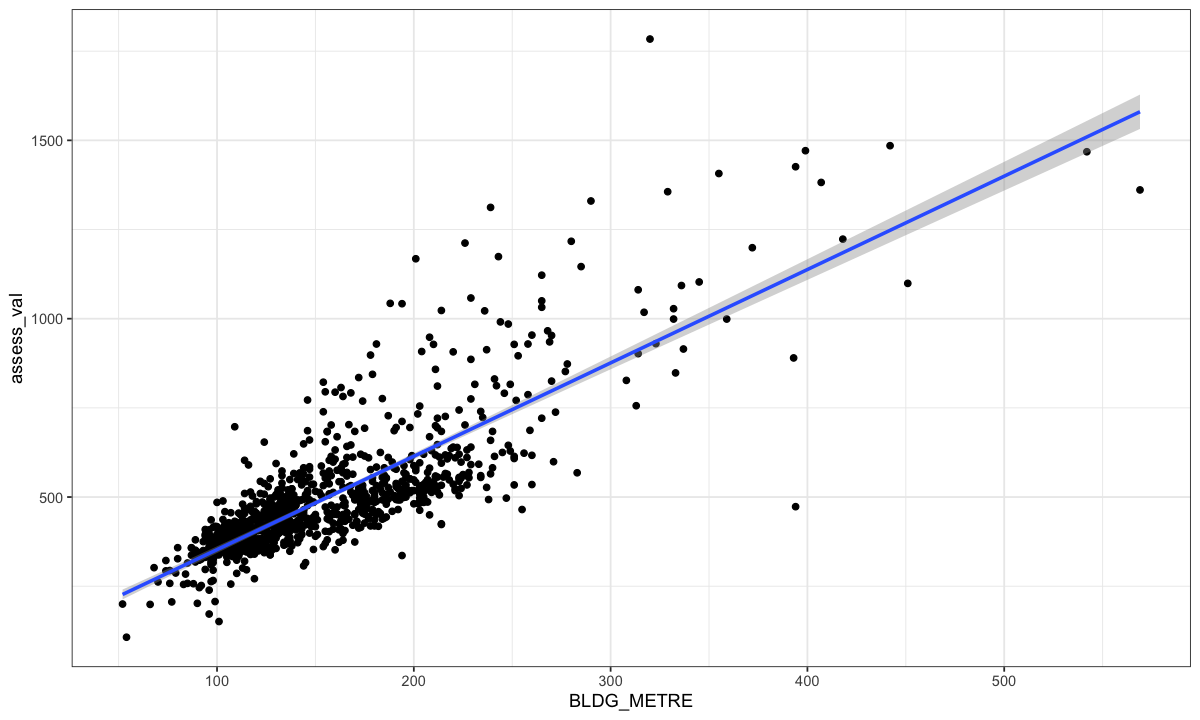

In [45]:
dat_s %>% ggplot(aes(BLDG_METRE, assess_val)) +
  geom_point() +
  theme_bw() +
  geom_smooth(method = "lm")

#### 2). Prediction error: the residuals

The red dot, <font color="red"> $e_i$ </font> in the plot, is called a *residual* and it measures the distance between an observed value $y_i$ and the predicted value $\hat{y}_i$ for a house of size $x_i=320$. How good is the prediction?? 


- <b><font color=salmon>Note: $\varepsilon_i \ne r_i$</font></b>
    - the <b><font color=salmon>residual $r_i$</font></b> is the distance between the observed (actual) value and the predicted value on the regression line (estimated from a sample)
        #### $$r_i=y_i-\hat{y}_i$$
    - the <b><font color=salmon>error term $\varepsilon_i$</font></b> is the distance between the observed (actual) value and the value on the regression line (calculated from the population and the diff comes from other factors that are not took into consideration)
        #### $$\varepsilon_i=y_i-E[Y|X_1]$$

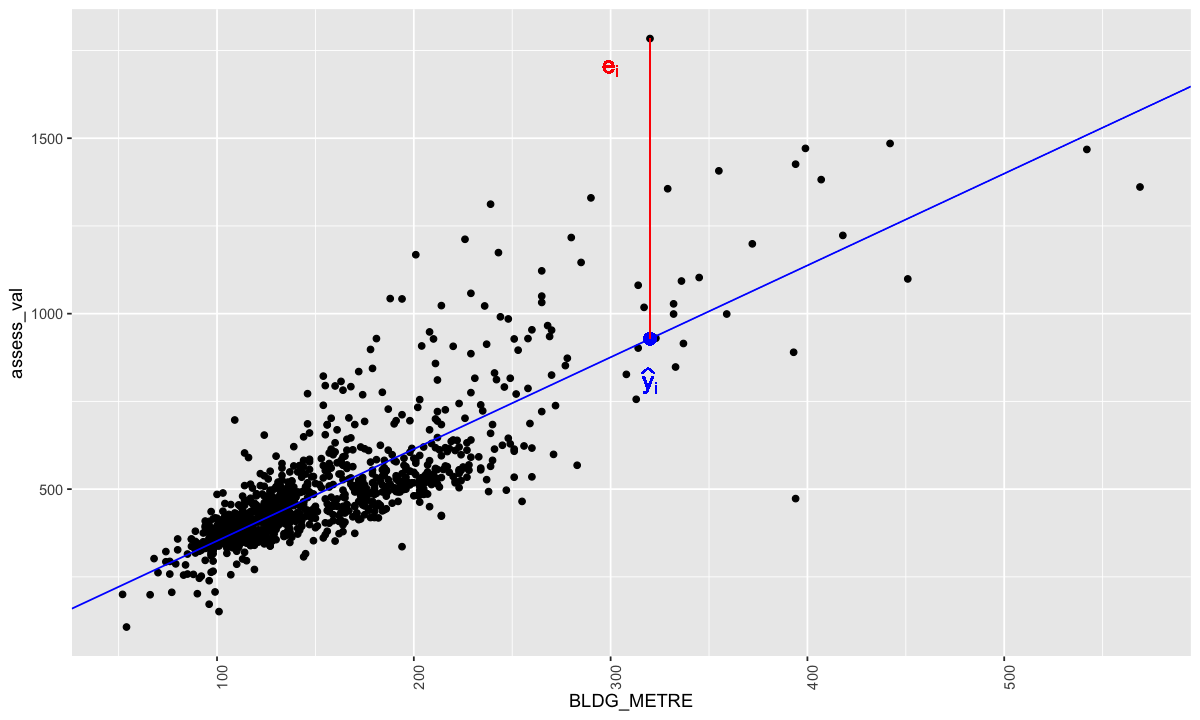

In [46]:
dat_s %>% ggplot(aes(BLDG_METRE, assess_val)) +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_point() +
  geom_abline(intercept = coef(lm_s)[1], slope = coef(lm_s)[2], col = "blue") +
  geom_point(aes(x = 320, y = predict(lm_s, data.frame(BLDG_METRE = 320))), color = "blue", size = 3) +
  geom_text(aes(x = 320, y = predict(lm_s, data.frame(BLDG_METRE = 320)) - 120, label = TeX("\\widehat{y}_i", output = "character")), color = "blue", size = 5, parse = TRUE) +
  geom_segment(x = 320, y = predict(lm_s, data.frame(BLDG_METRE = 320)), xend = 320, yend = 1784, color = "red") +
  geom_text(aes(x = 300, y = 1700, label = TeX("e_i", output = "character")), color = "red", size = 5, parse = TRUE)

## 5. Hypothesis tests for the regression coefficients

#### 1). summary

*Is the assessed value of a property related to its size??*

We can test hypotheses about the true regression coefficients! As a default, `lm` tests if <b><font color=salmon>the population parameter</font></b> (the intercept and the slope) are 0:

   - $H_0: \beta_0 = 0$ (null) *vs* $H_1: \beta_0 \neq 0$ (default alternative)
   
   > usually not interested in this hypothesis
   
   - $H_0: \beta_1 = 0$ (null) *vs* $H_1: \beta_1 \neq 0$ (default alternative)
   
   > we can use this test to answer to the question above
      
**The tidy table**

#### 2). Code

In [47]:
tidy(lm_s) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.769,9.793,9.268,0
BLDG_METRE,2.618,0.059,44.514,0


As you probably learned in DSCI_552, you can construct a test statistic as:

$$\text{test statistic} = \frac{\text{statistic-parameter}}{\text{standard error of the statistic}}$$

$$ \text{test statistic} = \frac {\text{`estimate` column}}  {\text{`std.error` column}} = `statistic` column$$

> Why??

In our case, and under the null hypothesis: $$t=\frac{\hat{b}}{SE(\hat{b})}$$

> **Mathematical result**: if the conditional distribution of the error terms $\varepsilon_i$ is Normal and estimating the $SE(\hat{b})$, the statistics $t$ above follows a $t$-distribution with $n-p$ degrees of freedom (df), where $n$ is the sample size and $p$ the number of parameters (in our case $p=2$)

In [48]:
statistic <- tidy(lm_s)$estimate / tidy(lm_s)$std.error
round(statistic[2], 3)

[1] 44.514

#### 3). Interpretation

**True**
- P-value is the likelihood of obtaining a test statistic at least as extreme as the one observed, given the null hypothesis is true (we are making a conditional p-value statement)
- regression coefficient associated with explanatory variable $X$ is statistically significant.
- when P-value is large (> the significance level $\alpha=0.05$), we fail to reject $H_0$. We don't have enough evidence to suggest that the explanatory variable is related to the response variable.
- When p-value is low (< the significance level $\alpha=0.05$), we can reject $H_0$, so there is enough statical evidence showing that the explanatory variable is significantly related to the response variable.

**Note**
- P-value is not the probability that the null hypothesis is true.
- P-value is not the probability that the finding is a "fluke".
- P-value is not the probability of falsely rejecting the null.
- P-value does not indicate the size or the importance of observed effects.

## 6. Questions

#### Q1. predicting with an estimated SLR

> Suppose we estimate a SLR with a continuous response and a continuous explanatory variable. Then the values predicted with the estimated model lie on the estimated regression line. True or False? 

#### <font color=red>  Answer: True, the predicted value with the estimated regression line lies on the line!  </font>


In a SLR with one continuous explanatory variable, the estimated model is a line!!

$$ \hat{y}_i=90.769 + 2.618 * x_{i}$$

The blue dot, <font color="blue"> $\hat{y}$ </font> in the line, is the *predicted* assessed value for a house of size 320 

> Note that there's no error in the formula of the estimated model. Given an observed sample, the estimated intercept and slope are real numbers (90.769 and 2.618, respectively, in this example) to construct a line that we can use to predict


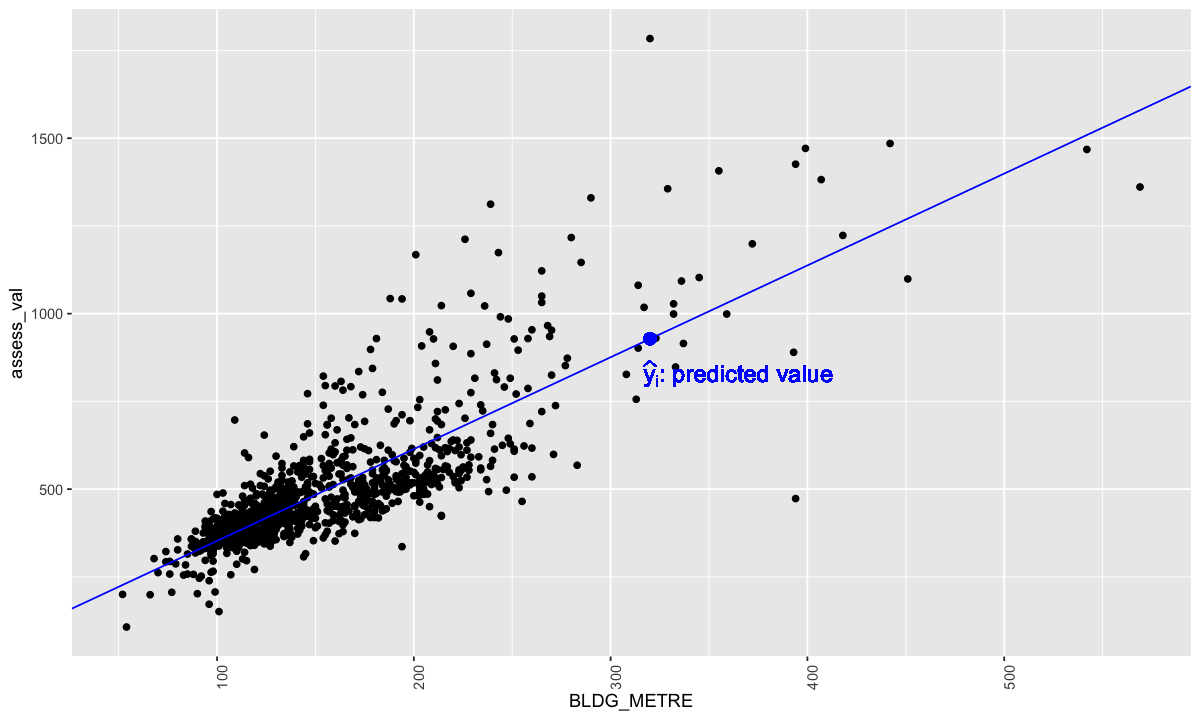

In [49]:
lm_s <- lm(assess_val ~ BLDG_METRE, data = dat_s)

dat_s %>% ggplot(aes(BLDG_METRE, assess_val)) +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_point() +
  geom_abline(intercept = coef(lm_s)[1], slope = coef(lm_s)[2], col = "blue") +
  geom_point(aes(x = 320, y = predict(lm_s, data.frame(BLDG_METRE = 320))), color = "blue", size = 3) +
  geom_text(aes(x = 365, y = predict(lm_s, data.frame(BLDG_METRE = 320)) - 100, label = TeX("\\widehat{y}_i: predicted value", output = "character")), color = "blue", size = 5, parse = TRUE)

#### Q2. test of hypothesis

> The `lm` function in R shows results of a hypothesis test for the slope of the LR where the null hypothesis states that the estimated coefficient equals 0. True or False?

#### <font color=red>  Answer: False, the null hypothesis states that the <b>population slope</b> is zero  </font>


The `lm` function in R shows results of the following hypothesis for the slope of a LR:

$$H_0: \beta_1 = 0 \text{ (null) versus } H_1: \beta_1 \neq 0 \text{ (default alternative)}$$
   
   > in words and for our case study, we want to test whether the assessed value of a property is related to its size 
   


We use the estimated coefficients ($\hat{\beta}_0$ and $\hat{\beta}_1$) to test this hypothesis, to construct a statistic. However, the hypothesis is about the *population* slope, not the *estimated* slope. 

> once we observe a sample, we know already that the slope is not zero, we don't need a test for that!! the test is to *infer* information about the *population quantities*

#### Q3. classical confidence intervals

> Confidence intervals (CI) created by `lm` are centered at the true population coefficients. True or False?

#### <font color=red>  Answer: False, the classical CI is centered at the estimated coefficient, $\hat{\beta}_1$ </font>


The classical CI calculated by `lm` come from the following result:

$$\left[\hat{\beta}_1 - t_{\alpha/2}\text{SE}(\hat{\beta}_1),\hat{\beta}_1 + t_{\alpha/2}\text{SE}(\hat{\beta}_1)\right]$$

where 

- $\hat{\beta}_1$ is the estimated slope

- $\text{SE}(\hat{\beta}_1)$ is the standard error of the estimated slope

- $t_{\alpha/2}$ is the percentile of the Student $t$-distribution with $n-p$ degrees of freedom ($\alpha$ is the corresponding significance level, for example 0.025 for a 95% CI)
   
   > similar formula for the intercept or other coefficients in the model 
   

We can also corroborate this numerically using our case study as an example:

#### Q4. bootstrapped confidence intervals
> Bootstrapped-CI are centered at the true population coefficients. True or False?

#### <font color=red>  Answer: False, none of these CI are centered at the *population* coefficients!!</font>

1. **Bootstrap-normal-theory CI**: Assumes that the estimator $\hat{\beta}$ follows a Normal distribution and uses *only* the bootstrap standard error (SE$^*(\hat{\beta})$) to construct CI

### $$\hat{\beta} \pm z_{\alpha/2}\text{SE}^*(\hat{\beta})$$

2. **Bootstrap-percentile CI**: Uses percentiles from the bootstrap sampling distribution 

### $$(\hat{\beta}^*_{\alpha/2}, \hat{\beta}^*_{1-\alpha/2})$$

> I dropped the subscript 1 to simplify the notation. This is true for the intercept or any slope in the model

    
<b><font color=LightSeaGreen>All confident intervals are centered at some estimate, obtained from your sample data!!</font></b>
    
- the classical CI are centered at the LS estimate (see Q3)

- the bootstrap-normal-theory CI are also centered at the LS estimate, but uses a different distribution (Normal vs *t*) and different SE, compared with classical CI
    
- the bootstrap-percentile CI are centered at (a value closed to) the median of all $B$ bootstrap estimates (the exact center depends on the function used to estimate the quantiles of the sampling distribution)
    
You can corroborate this numerically as well:

In [50]:
N <- 1000
B <- 1000

lm_boot <- replicate(B, {
  sample_n(dat_s, N, replace = TRUE) %>%
    lm(assess_val ~ BLDG_METRE, data = .) %>%
    .$coef
})

lm_boot <- data.frame(boot_intercept = lm_boot[1, ], boot_slope = lm_boot[2, ])

lm_boot  %>% select(boot_slope)  %>% 
             summarize(center_B_CI = quantile(boot_slope,0.025)+(quantile(boot_slope,0.975)-quantile(boot_slope,0.025))/2,
             median = median(boot_slope))

center_B_CI,median
<dbl>,<dbl>
2.611124,2.621561


# Lecture 4:  MLR and categorical variables

In [51]:
dat <- read.csv("data/Assessment_2015.csv")
dat <- dat %>%
  filter(ASSESSCLAS == "Residential") %>%
  mutate(assess_val = ASSESSMENT / 1000, age = 2020 - YEAR_BUILT)


# Our sample
set.seed(561)
dat_s <- sample_n(dat, 1000, replace = FALSE)

## 1. Summary

#### 1) Conceptual notes: population assumptions


- The conditional expectation is the best predictor of $Y$ given a set of explanatory variables $X_1, X_2, \ldots, X_p$
- The <font color=salmon>linear regression models the conditional expectation as a <b>linear combination</b> of the predictors</font>
    - we'll focus later on the meaning of *linear* 
    
$$ E[Y|X_1, \ldots, X_p] = \beta_0 + \beta_1 X_{1} + ...  + \beta_p X_{p}$$


- If the data is jointly Normal, the conditional expectation is truly linear!! Otherwise, this is just an assumption 

#### 2) Multiple linear regression


In many applications, we observe *many* explanatory variables

For example, both the size (continuous) and the age (discrete) of a property may affect its value


#### $$Y_i =  \beta_0 + \beta_1 \text{size}_i + \beta_2 \text{age}_i +\varepsilon_i$$


## 2. Visualizing the relation between the variables in the sample

- we observe a linear association between size and value

- and a negative association between age and value 

> - however there's a lot of variation in value for newer houses, perhaps because they vary a lot in size
> - the distribution of `age` seems bimodal! a normality assumption doesn's seem reasonable here!
> - we can transform variables to get closer to the assumed model (more about this in Regression II)

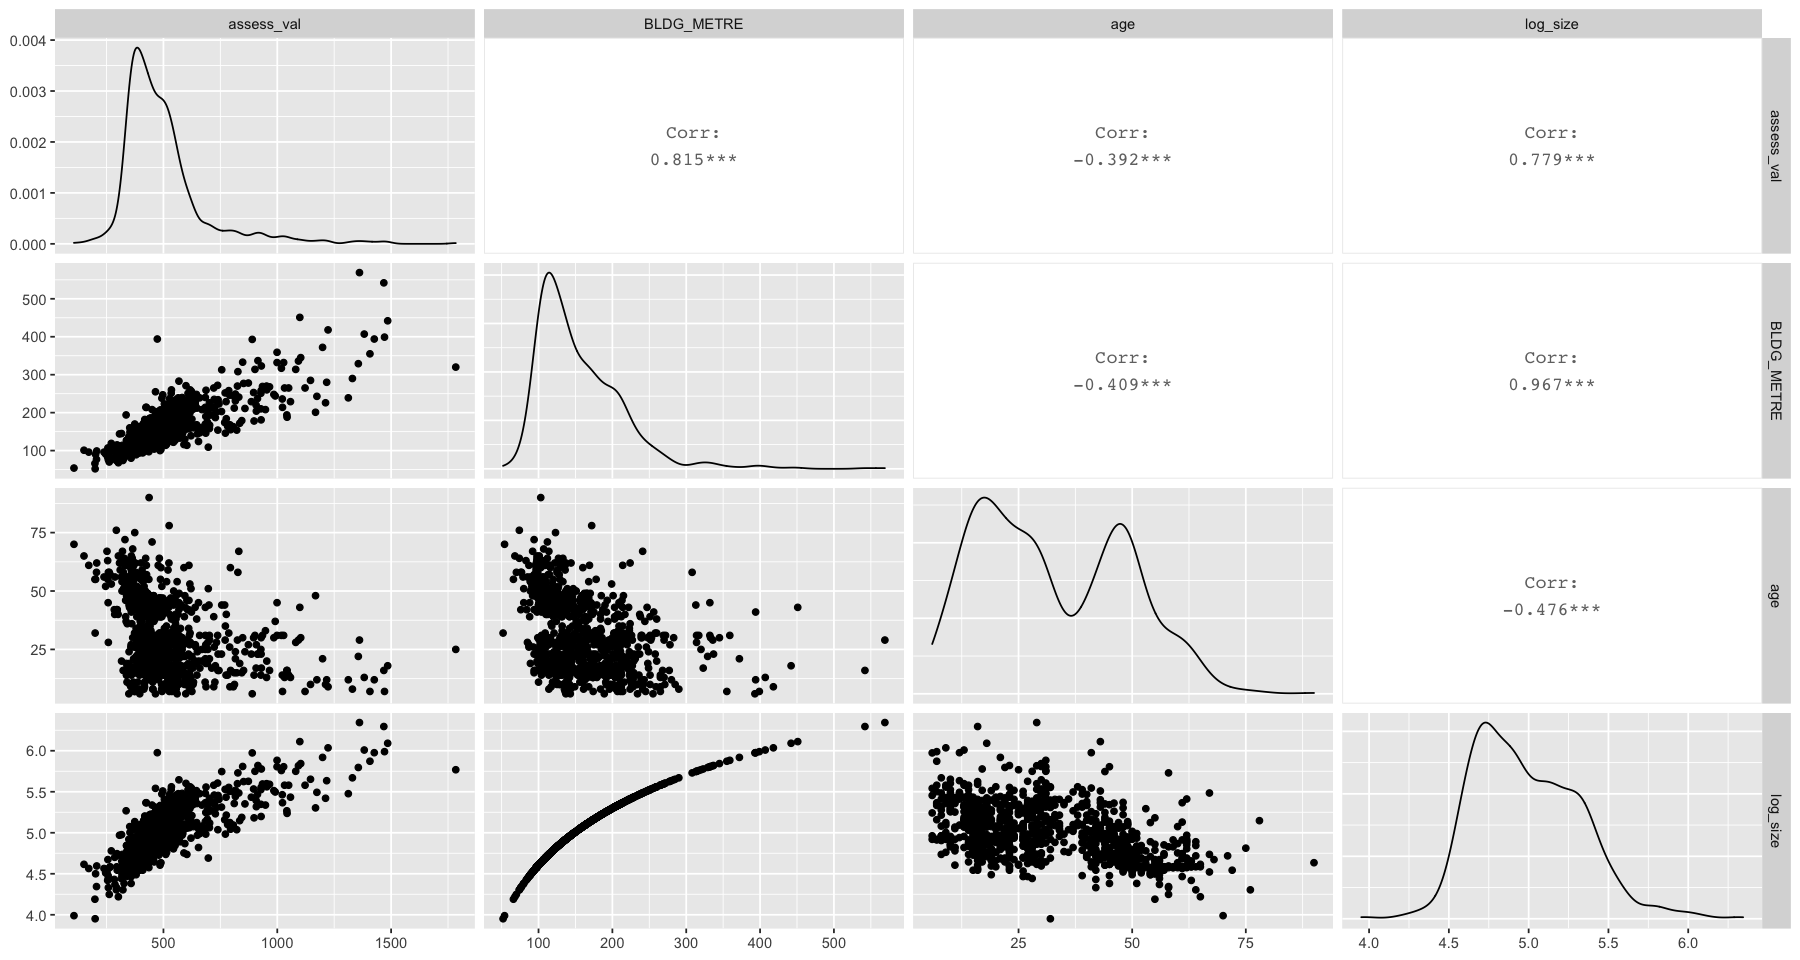

In [52]:
options(repr.plot.width=15, repr.plot.height=8)

dat_s %>%
  select(assess_val, BLDG_METRE, age) %>%
  mutate(log_size = log(BLDG_METRE)) %>%
  ggpairs()

## 3. SLR versus MLR

#### 1). SLR: one variable at a time

In [53]:
# Size
lm_size <- lm(assess_val ~ BLDG_METRE, data = dat_s)
tidy(lm_size)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.768749,9.79347555,9.268288,1.132776e-19
BLDG_METRE,2.617547,0.05880332,44.513599,2.897913e-239


In [54]:
# Age
lm_age <- lm(assess_val ~ age, data = dat_s)
tidy(lm_age)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),647.413924,12.3523539,52.41219,7.601564e-289
age,-4.576485,0.3403857,-13.44500,5.376037e-38


#### 2). MLR: more than one predictor

<b><font color=salmon>p-value</font></b>

- P value doesn't allow us to rank variables in importance. Okay.

- If p-value is low (< the significance level $\alpha=0.05$), we can reject H0, so there is enough statical evidence showing that this variable is significant.

In [55]:
lm_size_age <- lm(assess_val ~ BLDG_METRE + age, data = dat_s)
tidy(lm_size_age)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),131.508644,15.1982597,8.652875,1.986205e-17
BLDG_METRE,2.526029,0.0640819,39.418755,1.342602e-205
age,-0.814666,0.2333191,-3.491639,5.011087e-04


#### 3). Compare SLR and MLR 

<b><font color=salmon>sign of multicollinearity</font></b>

> The slope for `BLDG_METRE` remains almost the same but that of `age` is very different
- usually a sign of multicollinearity or confounding (lect08)
- If we consider the age and size together, the importance of age will drop a lot. -> a sign of multiple linearity
- The variable by itself is very different from the variables put together.
- if they were not that correlated then adding it to not change the estimation of the other one that much. Everything changes nothing is equal, but not by bad much 

In [56]:
tidy(lm_size_age) %>%
  select(term, estimate) %>%
  rename(MLR = estimate) %>%
  merge(tidy(lm_size) %>% select(term, estimate), by = "term", all = T) %>%
  rename(SLR_size = estimate) %>%
  merge(tidy(lm_age) %>% select(term, estimate), by = "term", all = T) %>%
  rename(SLR_age = estimate)

term,MLR,SLR_size,SLR_age
<chr>,<dbl>,<dbl>,<dbl>
(Intercept),131.508644,90.768749,647.413924
age,-0.814666,NA,-4.576485
BLDG_METRE,2.526029,2.617547,NA


## 4. MLR with continuous predictors

#### $$Y_i=\beta_0 + \beta_1 \text{size}_i+ \beta_2 \text{age}_i + \varepsilon_i$$

> MLR simultaneously models the association of multiple predictors with the response

**An important model assumption** 

If we hold the size of the property fix, say at 155mts:

- the relationship between the value and the age of the property is <b><font color=salmon>linear</font></b>

$$Y_i=\beta_0 + \beta_1 155 + \beta_2 \text{age}_i+ \varepsilon_i$$

- the slope $\beta_2$ <b><font color=salmon>does not depend</font></b> on the value held constant (The population parameter (betas) does not depend on the value of variable (X).)

(and same for holding `age` fix)

#### 1). the slope 

In general, the slope of `age` $\beta_2$ <b><font color=salmon>does not depend</font></b> on the value of size we hold fixed

> Note: I've created groups of houses of similar sizes to have enough points to look at the slope

> At the tail, this assumption doesn't seem to hold

`summarise()` ungrouping output (override with `.groups` argument)



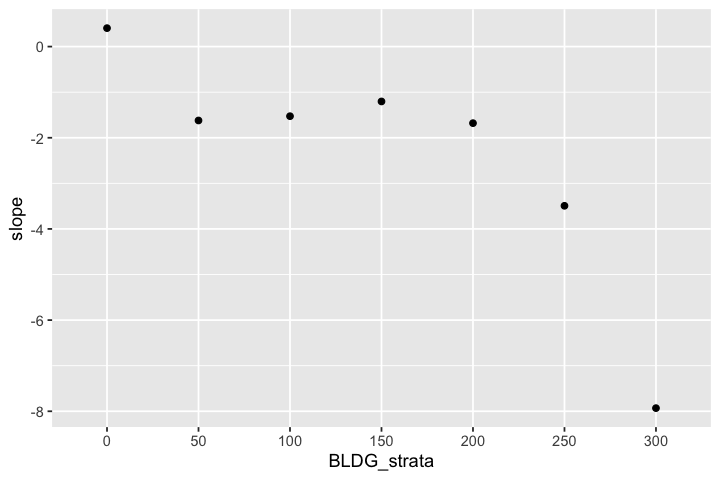

In [57]:
options(repr.plot.width=6, repr.plot.height=4)
dat %>%
  filter(BLDG_METRE <= 300) %>%
  mutate(BLDG_strata = factor(50 * round(BLDG_METRE / 50))) %>%
  group_by(BLDG_strata) %>%
  summarize(slope = cor(assess_val, age) * sd(assess_val) / sd(age)) %>%
  ggplot(aes(BLDG_strata, y = slope)) +
  geom_point()

#### 2). `lm` for MLR

- Code
    - `lm_s <- lm(assess_val~BLDG_METRE + age,data=dat_s)`
    - variables are added to the model using `+`
    
- `lm` uses a method called **least squares** to estimate the coefficients from a random sample
    - <b><font color=salmon>Least squares estimators minimizes the mean squared error (MSE) loss function</font></b>

In [58]:
lm_size_age <- lm(assess_val ~ BLDG_METRE + age, data = dat_s)

tidy(lm_size_age) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),131.509,15.198,8.653,0.000
BLDG_METRE,2.526,0.064,39.419,0.000
age,-0.815,0.233,-3.492,0.001


#### 3). Interpretation

***Two estimated slopes***: $\hat{\beta_1} = 2.526$ and $\hat{\beta_2} = -0.815$ 

- <b><font color=salmon>Holding age constant</font></b>, for every additional meter in the size of a house, we <b><font color=salmon>predict an increase (or say associated)</font></b> of 2526 dollars in the assessed value.


- <b><font color=salmon>Holding size constant</font></b>, for every additional year a house has, we <b><font color=salmon>predict an decrease (or say associated)</font></b> of 815 dollars in the assessed value.
    
   > is it reasonable to assume the that slope does not depend on the value being held constant??
   > - Okay assumption

#### 4). Confidence Intervals

- CI can be constructed using <b><font color=salmon>bootstrapping</font></b>, either to estimate     
    - the SE or
    - the sampling distribution of any coefficient
    
    
    
- The `lm` function uses results from asymptotic theory to construct confidence intervals

In [59]:
tidy(lm_size_age, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),131.508644,15.1982597,8.652875,1.986205e-17,101.684396,161.3328916
BLDG_METRE,2.526029,0.0640819,39.418755,1.342602e-205,2.400278,2.6517796
age,-0.814666,0.2333191,-3.491639,5.011087e-04,-1.272519,-0.3568132


#### 5). `augment`  (Prediction)

- As before, the <b><font color=salmon>predicted</font></b> assessed value is a point on the estimated hyper-plane
#### $$ \hat{y}_i=131.51 + 2.526 * x_{i1} - 0.815 * x_{i2}$$

- <b><font color=salmon>Note: $\varepsilon_i \ne r_i$</font></b>
    - the <b><font color=salmon>residual $r_i$</font></b> is the distance between the observed (actual) value and the predicted value on the regression line (estimated from a sample)
        #### $$r_i=y_i-\hat{y}_i$$
    - the <b><font color=salmon>error term $\varepsilon_i$</font></b> is the distance between the observed (actual) value and the value on the regression line (calculated from the population and the diff comes from other factors that are not took into consideration)
        #### $$\varepsilon_i=y_i-E[Y|X_1]$$

- They are random variables since they are functions of the estimated coefficients

> we can estimate their standard error and CI!!       


- **NOTE**: the `augment` function is very useful to add in-sample predicted values to the original dataset!

In [60]:
augment(lm_size_age, dat_s) %>% head(3)

the_geom,TAX_YEAR,ROLL_NUM,ADDRESS,YEAR_BUILT,ASSESSCLAS,BLDG_DESC,BLDG_METRE,BLDG_FEET,GARAGE,⋯,LATITUDE,LONGITUDE,assess_val,age,.fitted,.resid,.std.resid,.hat,.sigma,.cooksd
<chr>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
POINT (-113.26828568594681 53.53364376673626),2015,-2147483648,107 GLENCOE BLVD,1990,Residential,2 Storey & Basement,220,2368,Y,⋯,53.53381,-113.2685,536,30,662.7950,-126.794977,-1.16808681,0.002294257,108.6541,1.045848e-03
POINT (-113.31770257850987 53.516152401699564),2015,-2147483648,116 WILLOW ST,1959,Residential,1 Storey & Basement,97,1044,Y,⋯,53.51608,-113.3180,370,61,326.8388,43.161196,0.39800089,0.004210664,108.7199,2.232698e-04
POINT (-113.28777490571461 53.52360710210846),2015,-2147483648,45 RAVEN DR,1966,Residential,1 Storey & Basement,89,960,N,⋯,53.52373,-113.2880,318,54,312.3332,5.666764,0.05222813,0.003195445,108.7284,2.914801e-06


#### 6). Hypothesis tests on the regression coefficients

- **Same as before, just more coefficients!!**
> As a default, `lm` tests if <b><font color=salmon>the population parameter (intercept and the slopes)</font></b> are 0:
   - $H_0: \beta_0 = 0$ (null) *vs* $H_1: \beta_0 \neq 0$ (default alternative)
   - $H_0: \beta_1 = 0$ (null) *vs* $H_1: \beta_1 \neq 0$ (default alternative)
   - $H_0: \beta_2 = 0$ (null) *vs* $H_1: \beta_2 \neq 0$ (default alternative)
   
   
   
- **Under the null hypothesis:** 

$$t=\frac{\hat{\beta_j}}{SE(\hat{\beta_j})}$$

> Recall from DSCI552: when the estimator is the sample mean, the $SE(\bar{X}) = \hat{\sigma}/\sqrt{n}$, other estimators have different standard errors.


> **Mathematical result**: the statistics $t$ follows a $t$-distribution with $n-p$ degrees of freedom (df), where $n$ is the sample size and $p$ the number of parameters (in this case $p=3$)

In [61]:
tidy(lm_size_age) %>% mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),131.509,15.198,8.653,0.000
BLDG_METRE,2.526,0.064,39.419,0.000
age,-0.815,0.233,-3.492,0.001


## 5. MLR: categorical variables with many levels

> The dataset we are working with does not have a categorical variable with more levels so let's create one:    
> `generation`: a discrete variable with 3 levels: "old" for houses built before 1980, "modern" for houses built between 1981-2000, "new" for houses built after 2000

#### 1). Summary

#### <b><font color=LightSeaGreen>How?</font></b>
> We just need more dummy variables!!

$$E[Y|X_2,X_3]=\beta_0 + \beta_2 X_2 + \beta_3 X_3$$

> Note: I'm using the name $X_2$ to keep it consistent with lect02 but you can use any other name for the variables and the coefficients    
> For example, you may prefer:   
> $$ E[Y|X_2,X_3] = \beta_0 + \beta_M M + \beta_N N$$
> where $M$ and $N$ are dummy variables

<br>

#### <b><font color=LightSeaGreen>Math</font></b>

$$\text{M}=X_2 = \left\{ \begin{array}{ll}
         1 & \text{if generation = "Modern"};\\
         0 & \text{if otherwise}\end{array} \right.$$
         
         
$$\text{N}=X_3 = \left\{ \begin{array}{ll}
         1 & \text{if generation = "New"};\\
         0 & \text{if otherwise}\end{array} \right.$$
         
   
> Note that we need <b><font color=salmon>two dummy variable for 3 levels</font></b> (2 levels compared to one reference level). The reference level is the same for both dummy variables and equal to 0. The other levels equal 1 in each dummy variable.


   
- if generation = "old": $E[Y|X_2=0,X_3=0]=\beta_0$

- if generation = "modern": $E[Y|X_2=1, X_3=0]=\beta_0 + \beta_2$

- if generation = "new": $E[Y|X_2=0,X_3=1]=\beta_0 + \beta_3$

Then,

- $\beta_2=E[Y|\text{mod}]-E[Y|\text{old}]$ 
> $H_0: \beta_2=0$

- $\beta_3=E[Y|\text{new}]-E[Y|\text{old}]$
> $H_0: \beta_3=0$

#### 2). Code

In [62]:
dat <- dat %>% mutate(generation = cut(YEAR_BUILT,
  breaks = c(-Inf, 1980, 2000, +Inf),
  labels = c("Old", "Modern", "New")
))

set.seed(561)
dat_s <- sample_n(dat, 1000, replace = FALSE)

cbind(
  generation = c("Old", "Modern", "New"), 
  dat %>% summarize(pop_count = summary(generation)),
  dat_s %>% summarize(sample_count = summary(generation))
)

generation,pop_count,sample_count
<chr>,<int>,<int>
Old,10748,384
Modern,8799,331
New,8152,285


In [63]:
tidy(lm(assess_val ~ generation, dat_s))

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),409.5833,8.928084,45.87584,6.039893e-248
generationModern,131.7883,13.121917,10.04337,1.126496e-22
generationNew,159.5219,13.678828,11.66196,1.497539e-29


#### 3). Interpretation

Interpretation of the estimated coefficients

- The estimated **intercept**, $\hat{\beta}_0=409.58$, is the <b><font color=salmon>average</font></b> assessed value for Old properties!!

> It is the sample version of the conditional expectation (mean of the reference group)

- The estimated **"slopes"** (we have 2, one per dummy variable) are <b><font color=salmon>the differences of sample means</font></b>
    - $\hat{\beta}_2=131.79$: difference between sample mean of Modern houses and sample mean of Old houses. In other words, on average, modern houses are valued 131788 dollars higher than old houses.
    - $\hat{\beta}_3=159.5219$: difference between sample mean of New houses and sample mean of Old houses. In other words, on average, new houses are valued 159521 dollars higher than old houses.

> It is the sample version of the difference of the conditional expectations (or group means)